In [1]:
from sklearn import ensemble, cross_validation, learning_curve, metrics
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score

from sklearn.model_selection import GroupKFold

from sklearn.model_selection import GroupShuffleSplit
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from scipy.stats.kde import gaussian_kde
from scipy.optimize import brentq

import itertools

C:\Users\Popova_Va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Popova_Va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Popova_Va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are mov

In [2]:
triplexes = pd.read_csv('basetriples.csv', header=0, sep='\t')

In [9]:
triplexes.head()

,pdb_chain,type,dssrs,bps,dists,same12,local12,longrange12,same23,local23,...,h3p5,b3p5,i3p5,j3p5,lc3p5,li3p5,lp3p5,fl3p5,fed3p5,istriple
0,1b23.cif1_R,110,R.4SU.8.R.C.11.R.G.15.,-_-_-,11.88_20.1_12.32,0,1,0,0,1,...,1,0,0,0,1,0,0,9,1,0
1,1b23.cif1_R,110,R.A.9.R.A.13.R.C.62.,tHW_-_-,11.7_27.0_26.22,0,0,1,0,0,...,0,0,0,0,0,0,0,7,1,0
2,1b23.cif1_R,111,R.4SU.8.R.A.14.R.A.46.,tWH_t.W_cSS,10.04_12.76_4.86,0,0,1,0,0,...,0,0,0,0,0,0,0,5,1,1
3,1b23.cif1_R,111,R.4SU.8.R.G.15.R.G.48.,-_t.W_cSS,12.32_13.49_4.06,0,0,1,0,0,...,0,0,0,0,0,0,0,5,0,1
4,1b23.cif1_R,111,R.A.9.R.A.13.R.A.22.,tHW_tSH_-,11.7_10.01_13.84,0,0,1,1,0,...,0,0,0,0,0,0,0,4,0,1


In [22]:
triplexes.shape

(34415, 477)

In [11]:
triplexes.columns

Index(['pdb_chain', 'type', 'dssrs', 'bps', 'dists', 'same12', 'local12',
       'longrange12', 'same23', 'local23',
       ...
       'h3p5', 'b3p5', 'i3p5', 'j3p5', 'lc3p5', 'li3p5', 'lp3p5', 'fl3p5',
       'fed3p5', 'istriple'],
      dtype='object', length=477)

In [12]:
#целевая переменная
triplex_target = triplexes.istriple.values

In [14]:
triplex_target, len(triplex_target)

(array([0, 0, 1, ..., 0, 1, 0], dtype=int64), 34415)

In [18]:
print('triplex = 1: {:.2f}\ntriplex = 0: {:.2f}'.format(sum(triplex_target)/float(len(triplex_target)), 
                                                       1.0 - sum(triplex_target)/float(len(triplex_target))))

triplex = 1: 0.15
triplex = 0: 0.85


In [23]:
Counter(list(triplexes.pdb_chain.values))
#print(list(triplexes.pdb_chain.values))

Counter({'1b23.cif1_R': 19,
         '1c0a.cif1_B': 38,
         '1e8o.cif1_E': 2,
         '1et4.cif1_A': 15,
         '1evv.cif1_A': 23,
         '1f1t.cif1_A': 8,
         '1f7u.cif1_B': 11,
         '1fir.cif1_A': 25,
         '1gax.cif1_D': 19,
         '1h3e.cif1_B': 10,
         '1h4s.cif1_T': 33,
         '1hc8.cif1_C': 16,
         '1i6u.cif1_C': 12,
         '1il2.cif1_C': 22,
         '1j1u.cif1_B': 27,
         '1j2b.cif1_C': 4,
         '1kh6.cif1_A': 3,
         '1kog.cif1_O': 14,
         '1kuq.cif1_B': 8,
         '1kxk.cif1_A': 7,
         '1l2x.cif1_A': 5,
         '1mfq.cif1_A': 32,
         '1mji.cif1_D': 15,
         '1mms.cif1_C': 17,
         '1mzp.cif1_B': 19,
         '1n78.cif1_C': 24,
         '1nbs.cif1_B': 67,
         '1q96.cif1_A': 2,
         '1qf6.cif1_B': 26,
         '1qtq.cif1_B': 25,
         '1qu2.cif1_T': 19,
         '1s03.cif1_B': 5,
         '1s03.cif1_A': 14,
         '1ser.cif1_T': 20,
         '1u0b.cif1_A': 26,
         '1u6b.cif1_B': 70,
 

In [3]:
### !!!!! необходимые данные

triplexes_data = triplexes.iloc[:, 5:475]
triplexes_target = triplexes.iloc[:, 476]

In [30]:
triplexes_data[:1]

,same12,local12,longrange12,same23,local23,longrange23,same13,local13,longrange13,a1m5,...,u3p5,s3p5,h3p5,b3p5,i3p5,j3p5,lc3p5,li3p5,lp3p5,fl3p5
0,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,9


In [21]:
# разбиение на train и test простое (не используем)
from sklearn import cross_validation
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(triplexes_data, triplexes_target, test_size=0.3, )

In [214]:
#разбиваем выборки по группам pdb_chain

gss = GroupShuffleSplit(n_splits=1, test_size=0.3)
train_dataset,test_dataset = next(gss.split(X=triplexes, y=triplexes['istriple'], groups=triplexes.pdb_chain.values))


In [33]:
train_dataset.shape

(24338,)

# CONFUSION MATRIX ПО ГРУППАМ

In [230]:
#обучающая и тестовая выборки

check_train = triplexes.loc[list(train_dataset)]
target_train = check_train.istriple.values

check_train = check_train.iloc[:, 5:475]

check_test = triplexes.loc[list(test_dataset)]
target_test = check_test.istriple.values

rf_classifier = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)
rf_classifier.fit(check_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

CONFUSION MATRIX 4rdx.cif1_C
[[23  0]
 [ 1  4]]

AUC =  0.9


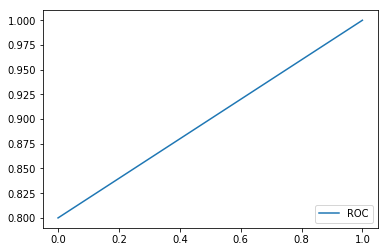

CONFUSION MATRIX 2xd0.cif1_W
[[17  0]
 [ 1  3]]

AUC =  0.875


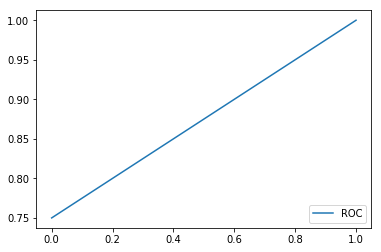

CONFUSION MATRIX 1et4.cif1_A
[[12  0]
 [ 2  1]]

AUC =  0.6666666666666666


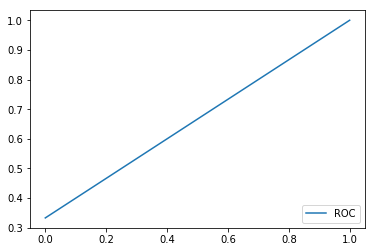

CONFUSION MATRIX 4lck.cif1_F
[[25  1]
 [ 3  2]]

AUC =  0.6807692307692307


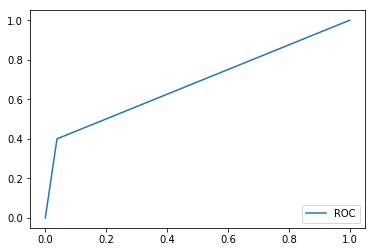

CONFUSION MATRIX 4qk8.cif1_A
[[28  3]
 [ 0  5]]

AUC =  0.9516129032258064


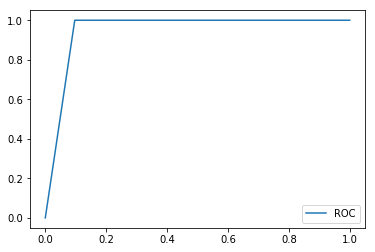

CONFUSION MATRIX 5d8h.cif1_A
[[18  1]
 [ 0  4]]

AUC =  0.9736842105263158


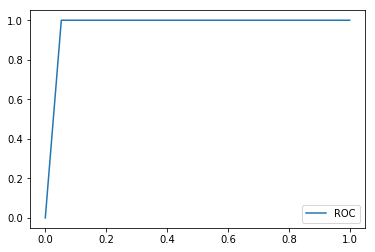

CONFUSION MATRIX 4y1j.cif1_A
[[25  0]
 [ 1  4]]

AUC =  0.9


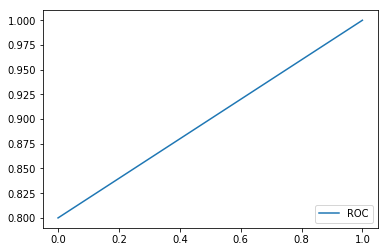

CONFUSION MATRIX 4m4o.cif1_B
[[7 6]
 [0 3]]

AUC =  0.7692307692307692


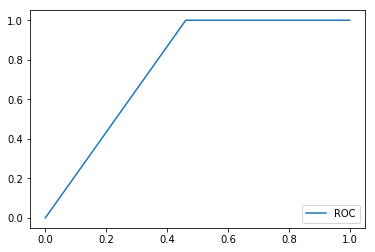

CONFUSION MATRIX 5j7l.cif1_DB
[[47  1]
 [ 0  9]]

AUC =  0.9895833333333333


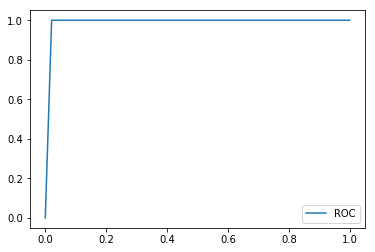

CONFUSION MATRIX 4p95.cif1_A
[[74  0]
 [ 9  3]]

AUC =  0.625


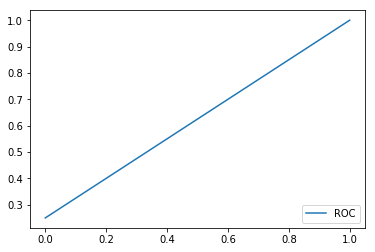

CONFUSION MATRIX 5xy3.cif1_3
[[42  2]
 [ 1  7]]

AUC =  0.9147727272727273


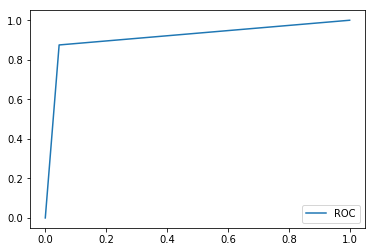

CONFUSION MATRIX 5o5j.cif1_A
[[490   2]
 [ 15  67]]

AUC =  0.9065040650406503


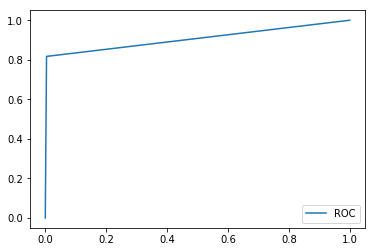

CONFUSION MATRIX 4pcj.cif1_A
[[3 0]
 [0 1]]

AUC =  1.0


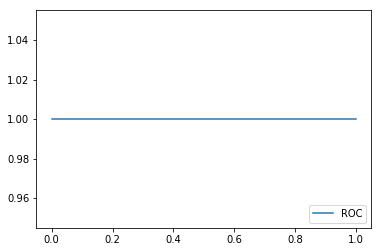

CONFUSION MATRIX 6az3.cif1_7
[[15  1]
 [ 0  3]]

AUC =  0.96875


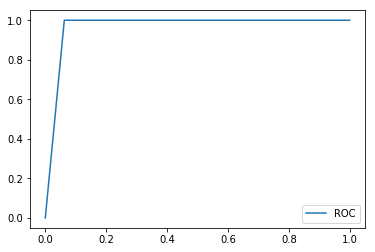

CONFUSION MATRIX 5swd.cif1_B
[[1 0]
 [1 0]]

AUC =  0.5


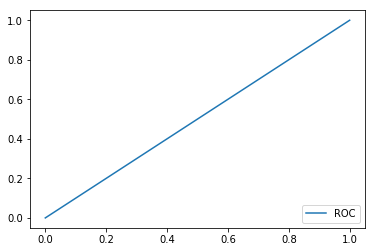

CONFUSION MATRIX 6ek0.cif1_L7
[[40  1]
 [ 0  8]]

AUC =  0.9878048780487805


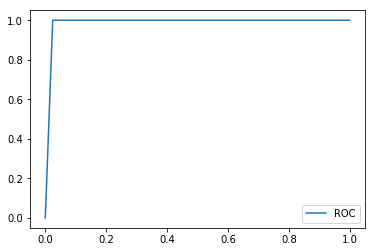

CONFUSION MATRIX 5el4.cif1_3L
[[16  0]
 [ 0  3]]

AUC =  1.0


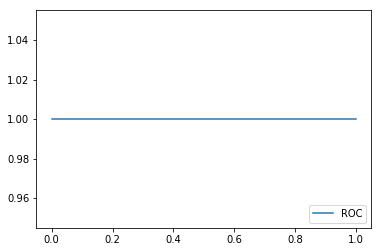

CONFUSION MATRIX 5y7m.cif1_D
[[1 0]
 [0 1]]

AUC =  1.0


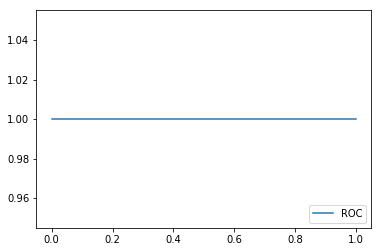

CONFUSION MATRIX 5oql.cif1_2
[[17  1]
 [ 0  3]]

AUC =  0.9722222222222222


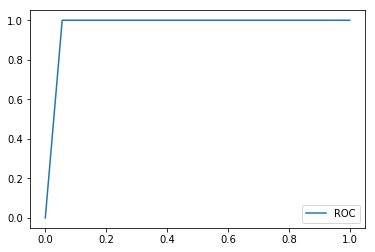

CONFUSION MATRIX 1u6b.cif1_B
[[57  2]
 [ 5  6]]

AUC =  0.7557781201848998


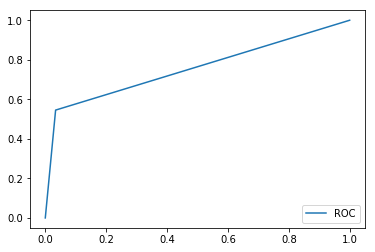

CONFUSION MATRIX 5ah5.cif1_D
[[8 0]
 [1 1]]

AUC =  0.75


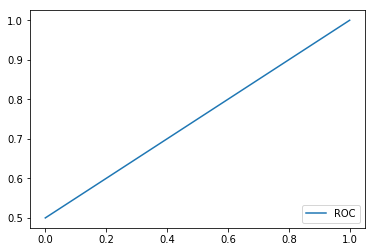

CONFUSION MATRIX 3ivk.cif1_M
[[36  1]
 [ 4  2]]

AUC =  0.6531531531531531


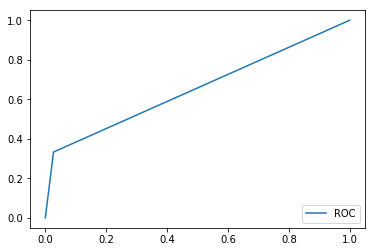

CONFUSION MATRIX 6ha1.cif1_x
[[2 0]
 [0 1]]

AUC =  1.0


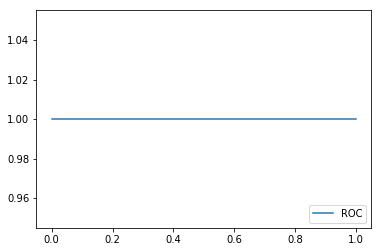

CONFUSION MATRIX 4nlf.cif1_A
[[1]]

ERROR Only one class present in y_true. ROC AUC score is not defined in that case. 4nlf.cif1_A


C:\Users\Popova_Va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\ranking.py:563: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


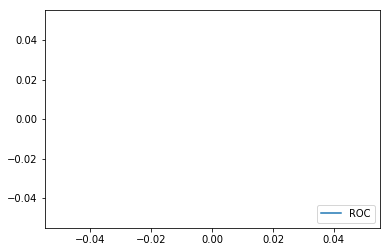

CONFUSION MATRIX 3rg5.cif1_B
[[2 0]
 [1 0]]

AUC =  0.5


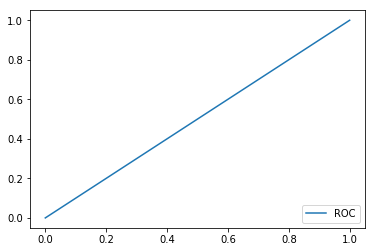

CONFUSION MATRIX 6cfj.cif1_1x
[[11  4]
 [ 0  3]]

AUC =  0.8666666666666667


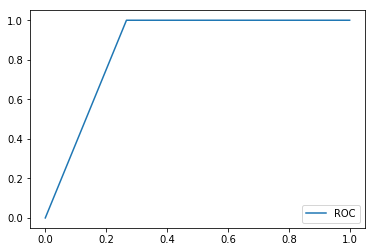

CONFUSION MATRIX 5xyi.cif1_2
[[367   1]
 [ 15  46]]

AUC =  0.875690484675695


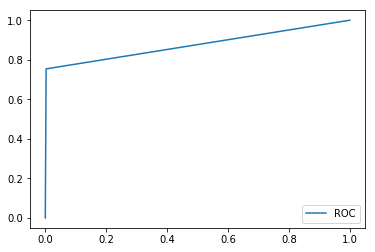

CONFUSION MATRIX 4jxz.cif1_B
[[6 1]
 [0 2]]

AUC =  0.9285714285714286


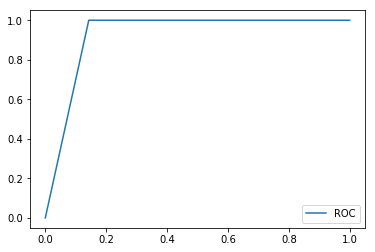

CONFUSION MATRIX 3u4m.cif1_B
[[22  2]
 [ 5  0]]

AUC =  0.4583333333333333


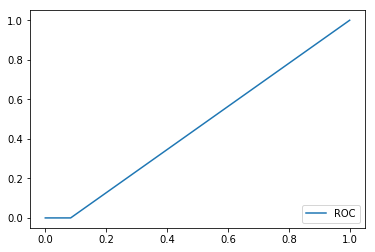

CONFUSION MATRIX 3ivn.cif1_A
[[17  0]
 [ 2  1]]

AUC =  0.6666666666666666


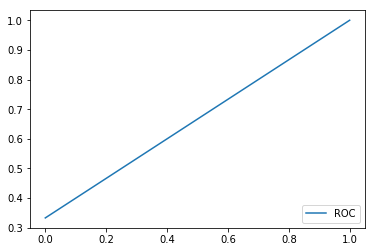

CONFUSION MATRIX 3icq.cif1_E
[[10  3]
 [ 0  3]]

AUC =  0.8846153846153846


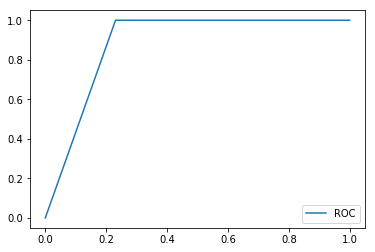

CONFUSION MATRIX 6eri.cif1_Ax
[[33  3]
 [ 0  7]]

AUC =  0.9583333333333333


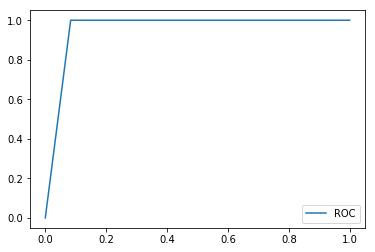

CONFUSION MATRIX 5tpy.cif1_A
[[6 0]
 [1 0]]

AUC =  0.5


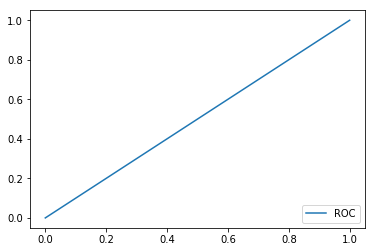

CONFUSION MATRIX 5xym.cif1_B
[[38  2]
 [ 0  7]]

AUC =  0.975


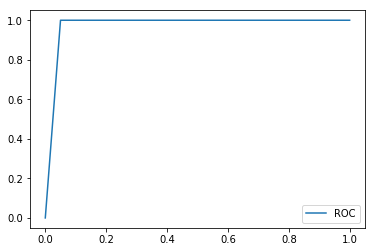

CONFUSION MATRIX 1q96.cif1_A
[[0 1]
 [0 1]]

AUC =  0.5


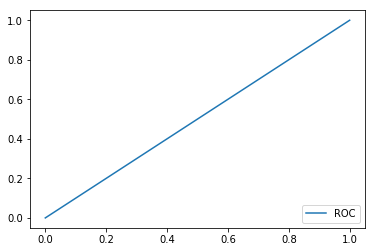

CONFUSION MATRIX 3g9c.cif1_Q
[[17  0]
 [ 3  0]]

AUC =  0.5


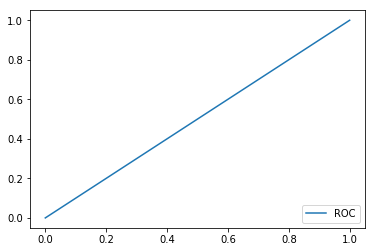

CONFUSION MATRIX 3q3z.cif1_V
[[19  0]
 [ 3  1]]

AUC =  0.625


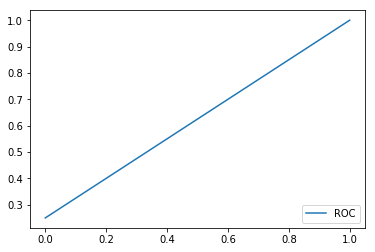

CONFUSION MATRIX 5btp.cif1_B
[[2 0]
 [1 0]]

AUC =  0.5


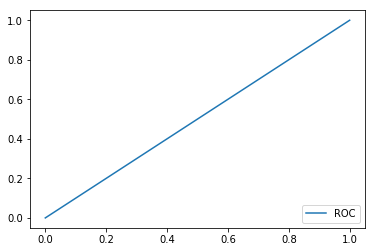

CONFUSION MATRIX 5hr6.cif1_C
[[15  2]
 [ 1  3]]

AUC =  0.8161764705882352


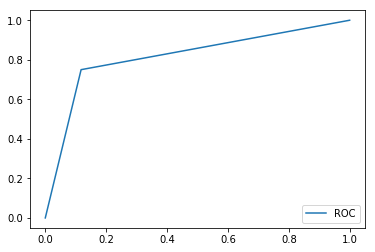

CONFUSION MATRIX 6d9j.cif1_2
[[327   0]
 [ 19  36]]

AUC =  0.8272727272727273


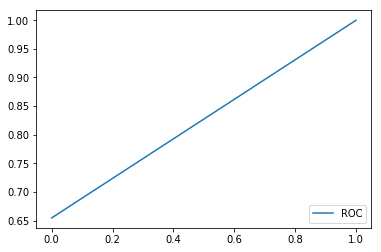

CONFUSION MATRIX 4enc.cif1_A
[[6 0]
 [1 0]]

AUC =  0.5


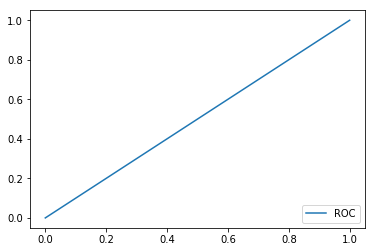

CONFUSION MATRIX 5e6m.cif1_C
[[21  2]
 [ 2  3]]

AUC =  0.7565217391304349


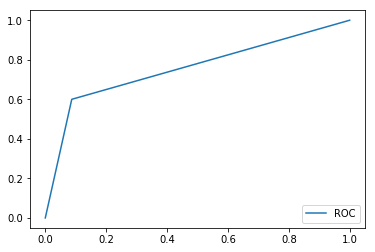

CONFUSION MATRIX 1kuq.cif1_B
[[6 1]
 [0 1]]

AUC =  0.9285714285714286


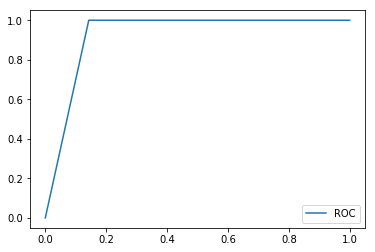

CONFUSION MATRIX 3j79.cif1_A
[[824   3]
 [ 43  95]]

AUC =  0.8423891137865166


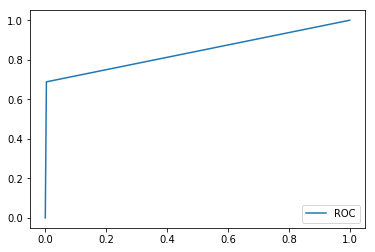

CONFUSION MATRIX 4lfb.cif1_A
[[498   2]
 [ 18  66]]

AUC =  0.8908571428571428


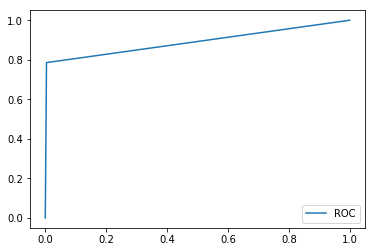

CONFUSION MATRIX 2qus.cif1_A
[[17  0]
 [ 2  2]]

AUC =  0.75


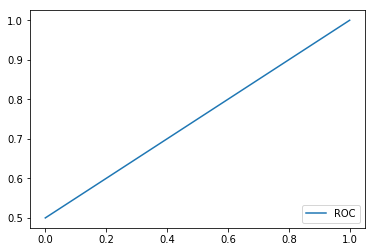

CONFUSION MATRIX 1j1u.cif1_B
[[23  0]
 [ 0  4]]

AUC =  1.0


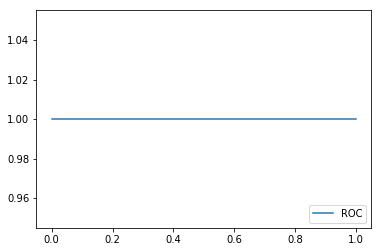

CONFUSION MATRIX 5b63.cif1_D
[[15  0]
 [ 0  3]]

AUC =  1.0


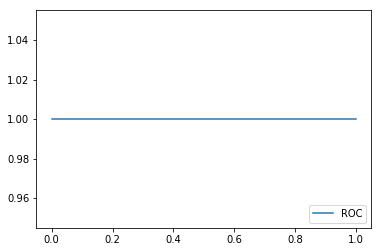

CONFUSION MATRIX 6d9j.cif1_7
[[27  1]
 [ 0  5]]

AUC =  0.9821428571428572


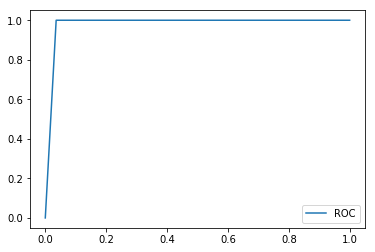

CONFUSION MATRIX 4xnr.cif1_X
[[14  0]
 [ 1  2]]

AUC =  0.8333333333333333


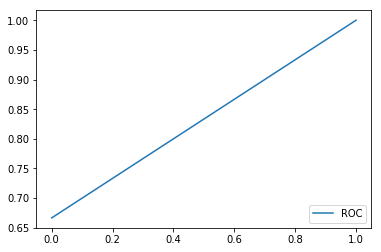

CONFUSION MATRIX 1mfq.cif1_A
[[27  0]
 [ 4  1]]

AUC =  0.6


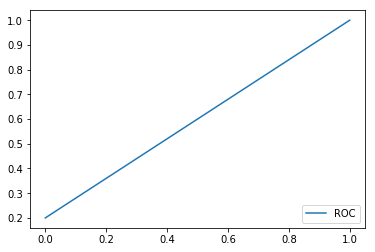

CONFUSION MATRIX 5voe.cif1_A
[[1 0]
 [0 1]]

AUC =  1.0


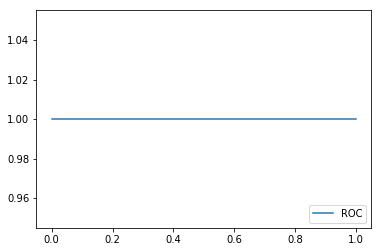

CONFUSION MATRIX 5tbw.cif1_AS
[[40  1]
 [ 0  7]]

AUC =  0.9878048780487805


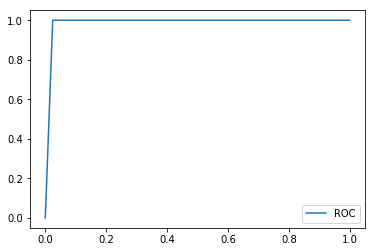

CONFUSION MATRIX 5fdv.cif1_1B
[[56  0]
 [ 0 11]]

AUC =  1.0


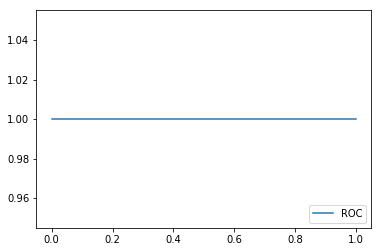

CONFUSION MATRIX 3ski.cif1_A
[[18  0]
 [ 2  2]]

AUC =  0.75


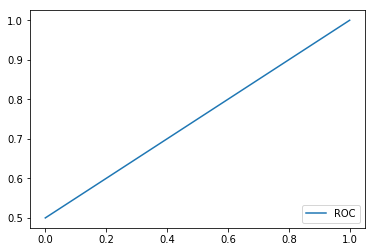

CONFUSION MATRIX 2dlc.cif1_Y
[[7 1]
 [0 2]]

AUC =  0.9375


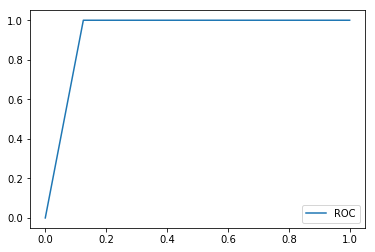

CONFUSION MATRIX 1xjr.cif1_A
[[1 0]
 [0 1]]

AUC =  1.0


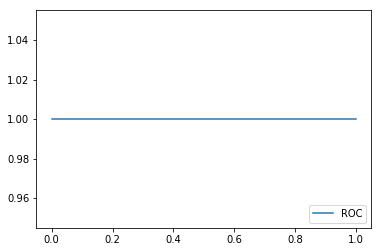

CONFUSION MATRIX 6az1.cif1_1
[[500   1]
 [ 28  56]]

AUC =  0.8323353293413173


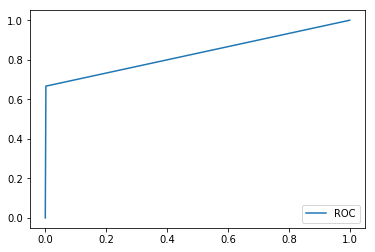

CONFUSION MATRIX 1n78.cif1_C
[[19  1]
 [ 1  3]]

AUC =  0.85


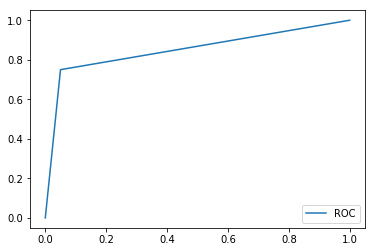

CONFUSION MATRIX 4y1m.cif1_B
[[15  0]
 [ 2  1]]

AUC =  0.6666666666666666


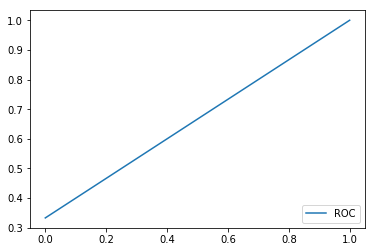

CONFUSION MATRIX 4m6d.cif1_H
[[8 8]
 [0 3]]

AUC =  0.75


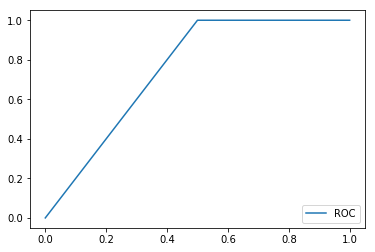

CONFUSION MATRIX 5lzs.cif1_3
[[13  1]
 [ 0  3]]

AUC =  0.9642857142857143


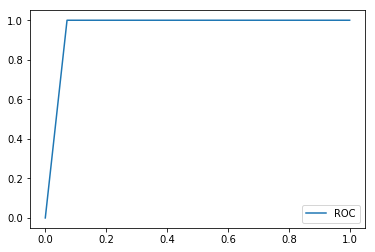

CONFUSION MATRIX 5t5h.cif1_C
[[18  0]
 [ 0  3]]

AUC =  1.0


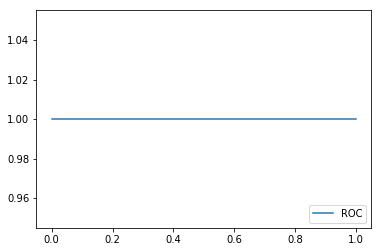

CONFUSION MATRIX 3v7e.cif1_C
[[23  2]
 [ 2  3]]

AUC =  0.7600000000000001


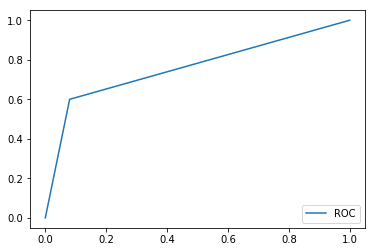

CONFUSION MATRIX 1qtq.cif1_B
[[19  2]
 [ 2  2]]

AUC =  0.7023809523809524


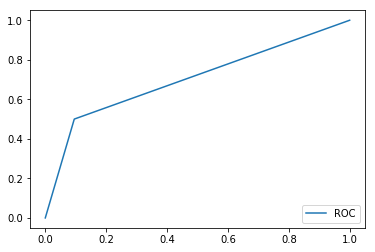

CONFUSION MATRIX 5e81.cif1_2K
[[14  0]
 [ 0  3]]

AUC =  1.0


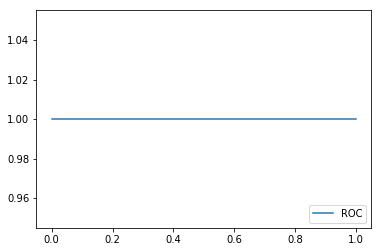

CONFUSION MATRIX 4znp.cif1_A
[[14  0]
 [ 2  1]]

AUC =  0.6666666666666666


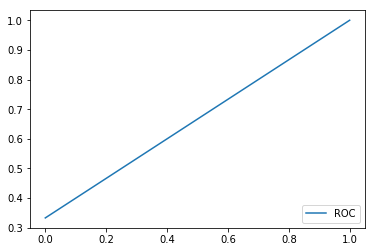

CONFUSION MATRIX 1hc8.cif1_C
[[13  0]
 [ 0  3]]

AUC =  1.0


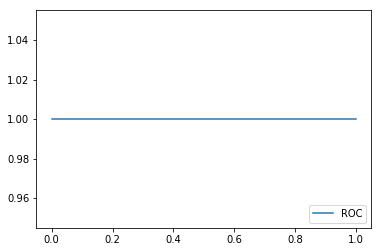

CONFUSION MATRIX 5wwt.cif1_C
[[15  2]
 [ 0  3]]

AUC =  0.9411764705882353


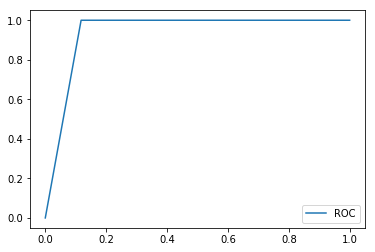

CONFUSION MATRIX 1b23.cif1_R
[[14  2]
 [ 3  0]]

AUC =  0.4375


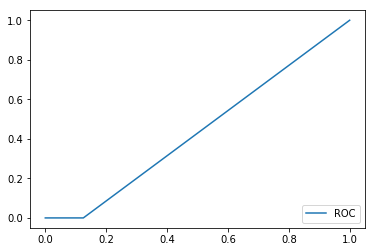

CONFUSION MATRIX 4lck.cif1_B
[[11  0]
 [ 0  2]]

AUC =  1.0


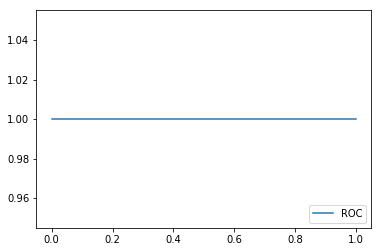

CONFUSION MATRIX 6d90.cif1_3
[[8 0]
 [1 1]]

AUC =  0.75


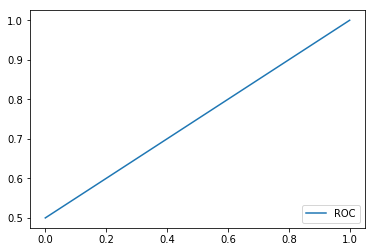

CONFUSION MATRIX 4fen.cif1_B
[[15  0]
 [ 2  1]]

AUC =  0.6666666666666666


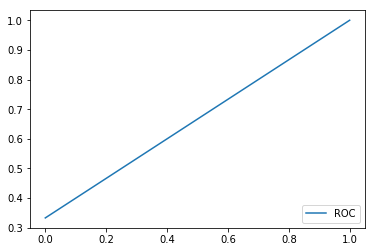

CONFUSION MATRIX 3moj.cif1_A
[[8 0]
 [0 2]]

AUC =  1.0


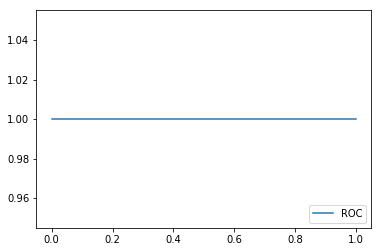

CONFUSION MATRIX 4wf9.cif1_Y
[[48  2]
 [ 2  8]]

AUC =  0.88


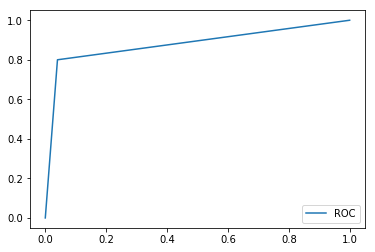

CONFUSION MATRIX 3lqx.cif1_B
[[1 0]
 [0 1]]

AUC =  1.0


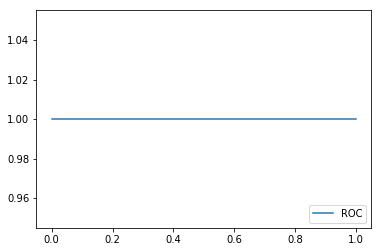

CONFUSION MATRIX 5fjc.cif1_A
[[31  3]
 [ 3  4]]

AUC =  0.7415966386554622


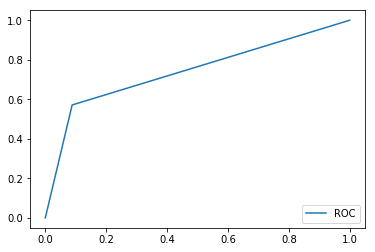

CONFUSION MATRIX 5mmm.cif1_z
[[16  1]
 [ 0  3]]

AUC =  0.9705882352941176


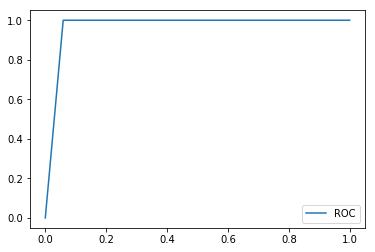

CONFUSION MATRIX 4ioa.cif1_Y
[[49  2]
 [ 0  9]]

AUC =  0.9803921568627452


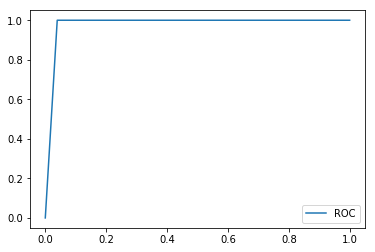

CONFUSION MATRIX 4v9f.cif1_0
[[987   1]
 [ 52 113]]

AUC =  0.8419181695497484


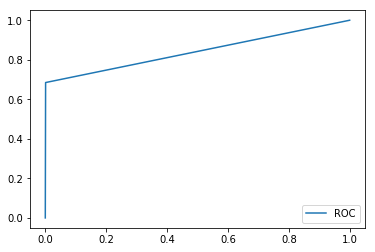

CONFUSION MATRIX 4zdo.cif1_E
[[3 0]
 [1 0]]

AUC =  0.5


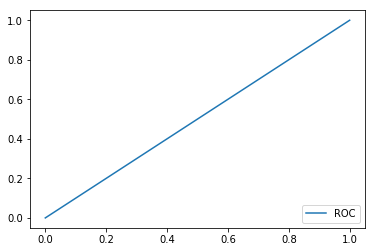

CONFUSION MATRIX 5e81.cif1_3L
[[1 1]
 [0 1]]

AUC =  0.75


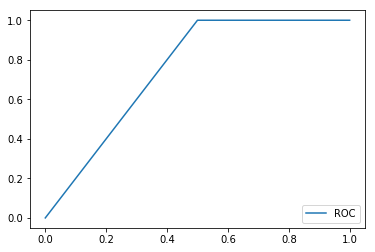

CONFUSION MATRIX 5u3g.cif1_B
[[22  0]
 [ 2  2]]

AUC =  0.75


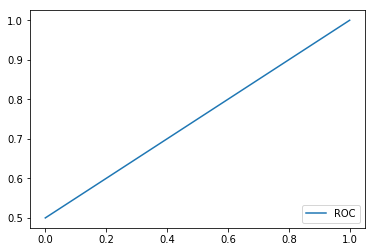

CONFUSION MATRIX 5t5h.cif1_B
[[242   0]
 [  7  34]]

AUC =  0.9146341463414633


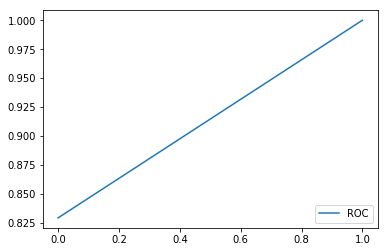

CONFUSION MATRIX 3igi.cif1_A
[[54  0]
 [ 6  3]]

AUC =  0.6666666666666666


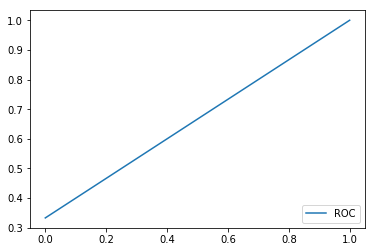

CONFUSION MATRIX 4wq1.cif1_3K
[[2 0]
 [0 1]]

AUC =  1.0


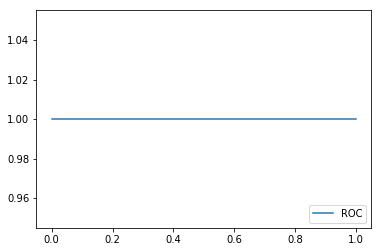

CONFUSION MATRIX 5x6b.cif1_P
[[2 0]
 [1 0]]

AUC =  0.5


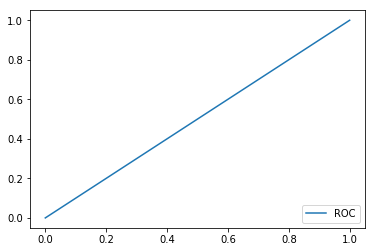

CONFUSION MATRIX 4rum.cif1_A
[[1 0]
 [0 1]]

AUC =  1.0


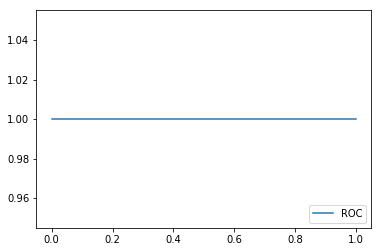

CONFUSION MATRIX 3agv.cif1_S
[[1 0]
 [0 1]]

AUC =  1.0


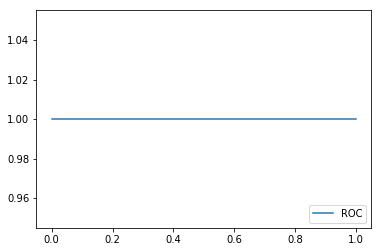

CONFUSION MATRIX 5e81.cif1_1K
[[12  0]
 [ 2  1]]

AUC =  0.6666666666666666


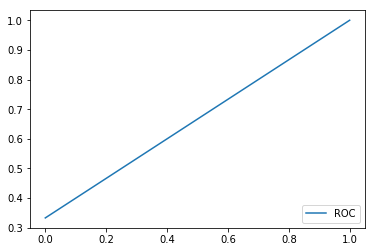

CONFUSION MATRIX 5wt1.cif1_C
[[27  0]
 [ 0  5]]

AUC =  1.0


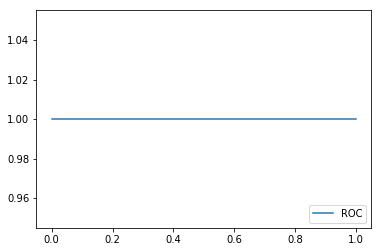

CONFUSION MATRIX 3j79.cif1_C
[[23  0]
 [ 0  4]]

AUC =  1.0


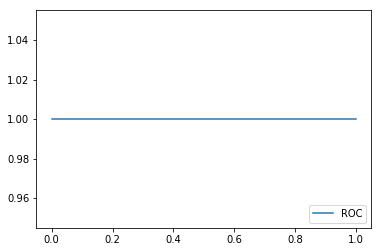

CONFUSION MATRIX 4wj4.cif1_B
[[28  0]
 [ 1  4]]

AUC =  0.9


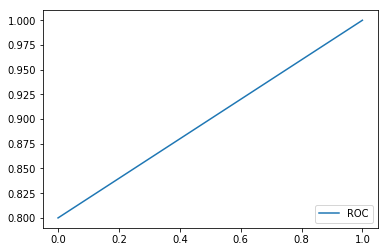

CONFUSION MATRIX 5czz.cif1_B
[[3 0]
 [0 1]]

AUC =  1.0


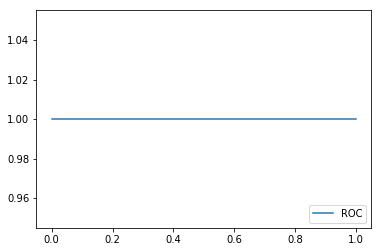

CONFUSION MATRIX 1y26.cif1_X
[[13  0]
 [ 1  2]]

AUC =  0.8333333333333333


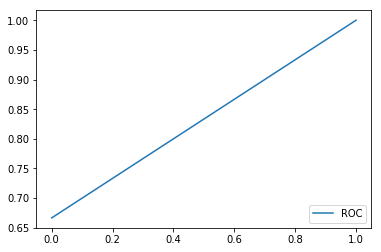

CONFUSION MATRIX 1mms.cif1_C
[[10  4]
 [ 0  3]]

AUC =  0.8571428571428572


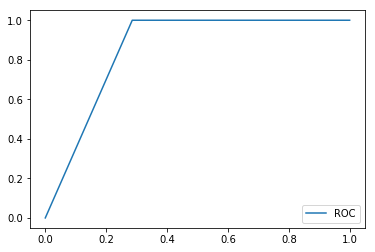

CONFUSION MATRIX 4pdb.cif1_I
[[6 0]
 [0 2]]

AUC =  1.0


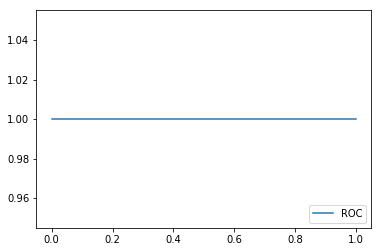

CONFUSION MATRIX 3hhn.cif1_E
[[26  1]
 [ 4  0]]

AUC =  0.4814814814814815


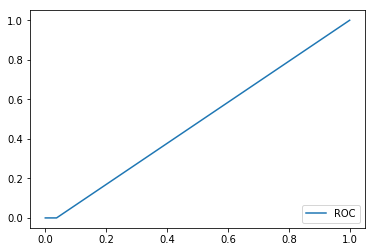

CONFUSION MATRIX 5de8.cif1_A
[[0 1]
 [0 1]]

AUC =  0.5


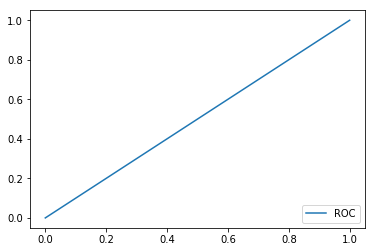

CONFUSION MATRIX 5ns3.cif1_C
[[15  1]
 [ 0  4]]

AUC =  0.96875


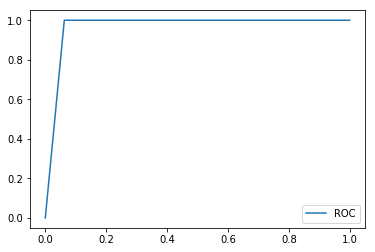

CONFUSION MATRIX 6ek0.cif1_L8
[[17  0]
 [ 0  3]]

AUC =  1.0


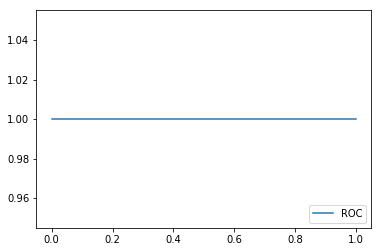

CONFUSION MATRIX 6cmn.cif1_D
[[1 1]
 [0 1]]

AUC =  0.75


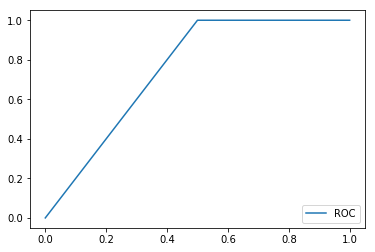

CONFUSION MATRIX 3zgz.cif1_B
[[8 0]
 [1 1]]

AUC =  0.75


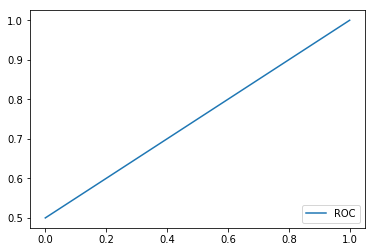

CONFUSION MATRIX 5xxb.cif1_1
[[720   1]
 [ 35  86]]

AUC =  0.8546784195504407


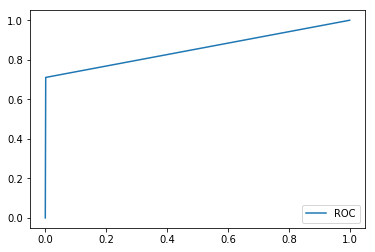

CONFUSION MATRIX 6dn2.cif1_X
[[1 0]
 [0 1]]

AUC =  1.0


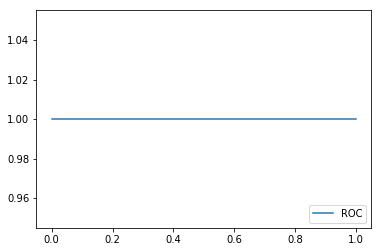

In [232]:
chains = list(set(check_test.pdb_chain.values))

for chain in chains:
    middle_check_test = check_test.loc[check_test['pdb_chain'] == chain]
    middle_target_test = middle_check_test['istriple']
    middle_check_test = middle_check_test.iloc[:, 5:475]
    
    prediction_result = rf_classifier.predict(middle_check_test)

    print("CONFUSION MATRIX", chain)
    print(confusion_matrix(middle_target_test, prediction_result))
    print("")
    fpr, tpr, _ = metrics.roc_curve(middle_target_test,  prediction_result)
    try:
        auc = metrics.roc_auc_score(middle_target_test, prediction_result)
        print("AUC = ", auc)
    except Exception as e:
        print("ERROR", e, chain)
    plt.plot(fpr, tpr, label="ROC")
    plt.legend(loc=4)
    plt.show()

In [223]:
chains = list(set(check_test.pdb_chain.values))


df.loc[df['column_name'] == some_value]

In [216]:
target_train = check_train.istriple.values
target_test = check_test.istriple.values


In [55]:
check_train = check_train.drop('istriple', axis=1)

In [57]:
check_test = check_test.drop('istriple', axis=1)

In [56]:
check_train.columns

Index(['pdb_chain', 'type', 'dssrs', 'bps', 'dists', 'same12', 'local12',
       'longrange12', 'same23', 'local23',
       ...
       's3p5', 'h3p5', 'b3p5', 'i3p5', 'j3p5', 'lc3p5', 'li3p5', 'lp3p5',
       'fl3p5', 'fed3p5'],
      dtype='object', length=476)

In [217]:
#middle check of shuffle
a = Counter(list(check_train.pdb_chain.values))
b = Counter(list(check_test.pdb_chain.values))

In [61]:
#check_train - target train
#check_test - target_test
check_train = check_train.iloc[:, 5:475]
check_test = check_test.iloc[:, 5:475]

In [218]:
a

Counter({'1c0a.cif1_B': 38,
         '1e8o.cif1_E': 2,
         '1evv.cif1_A': 23,
         '1f1t.cif1_A': 8,
         '1f7u.cif1_B': 11,
         '1fir.cif1_A': 25,
         '1gax.cif1_D': 19,
         '1h3e.cif1_B': 10,
         '1h4s.cif1_T': 33,
         '1i6u.cif1_C': 12,
         '1il2.cif1_C': 22,
         '1j2b.cif1_C': 4,
         '1kh6.cif1_A': 3,
         '1kog.cif1_O': 14,
         '1kxk.cif1_A': 7,
         '1l2x.cif1_A': 5,
         '1mji.cif1_D': 15,
         '1mzp.cif1_B': 19,
         '1nbs.cif1_B': 67,
         '1qf6.cif1_B': 26,
         '1qu2.cif1_T': 19,
         '1s03.cif1_B': 5,
         '1s03.cif1_A': 14,
         '1ser.cif1_T': 20,
         '1u0b.cif1_A': 26,
         '1u9s.cif1_A': 69,
         '1un6.cif1_F': 9,
         '1wz2.cif1_D': 10,
         '1y27.cif1_X': 18,
         '1yfg.cif1_A': 38,
         '2a43.cif1_A': 3,
         '2a64.cif1_A': 61,
         '2azx.cif1_D': 25,
         '2bte.cif1_B': 10,
         '2csx.cif1_C': 23,
         '2d6f.cif1_F': 19,
 

# Модель RandomForestClassifier

In [4]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)

In [100]:
rf_classifier.fit(check_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [101]:
prediction_result = rf_classifier.predict(check_test)

In [244]:
importances = rf_classifier.feature_importances_

In [102]:
print(classification_report(target_test, prediction_result))
print(accuracy_score(target_test, prediction_result))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      8593
          1       0.90      0.73      0.81      1484

avg / total       0.95      0.95      0.95     10077

0.9488935198967947


In [104]:
from sklearn.metrics import confusion_matrix
df_confusion = pd.crosstab(target_test, prediction_result, rownames=['Actual'], colnames=['Predicted'], margins=True)

In [162]:
tn, fp, fn, tp = confusion_matrix(target_test, prediction_result).ravel()
(tn, fp, fn, tp)

(8479, 114, 401, 1083)

In [5]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap="YlGnBu"):  #"YlGnBu" plt.cm.gray_r
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    print("CONFUSION MATRIX")
    print(df_confusion)
    a = itertools.product(range(df_confusion.shape[0]), range(df_confusion.shape[1]))
    for i, j in itertools.product(range(df_confusion.shape[0]), range(df_confusion.shape[1])):
        if i == 2:
            i_ = 'All'
        else:
            i_ = i
        if j == 2:
            j_ = 'All'
        else:
            j_ = j
        plt.text(i, j, df_confusion[i_][j_], horizontalalignment="center", color='black')
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

In [253]:
len(target_test), len(prediction_result)

(7861, 6883)

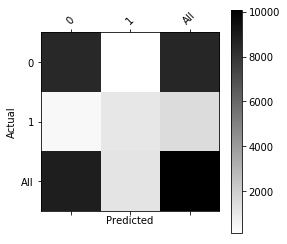

In [105]:
plot_confusion_matrix(target_test, prediction_result)

In [128]:
df_confusion

Predicted,0,1,All
Actual,,,
0,8479,114,8593
1,401,1083,1484
All,8880,1197,10077


In [147]:
# features importances

importances = rf_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(check_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1,  check_train.columns[indices[f]], importances[indices[f]]))


Feature ranking:
1. feature longrange13 (0.119534)
2. feature longrange12 (0.073529)
3. feature same13 (0.072003)
4. feature longrange23 (0.070585)
5. feature same12 (0.059425)
6. feature same23 (0.057597)
7. feature local13 (0.019279)
8. feature local23 (0.016617)
9. feature s1 (0.012341)
10. feature s3 (0.011082)
11. feature local12 (0.009530)
12. feature lc1 (0.006435)
13. feature lc3 (0.006227)
14. feature s2 (0.005344)
15. feature fl1 (0.004630)
16. feature fl2 (0.004530)
17. feature fl3m1 (0.004527)
18. feature fl1p3 (0.004396)
19. feature fl3 (0.004359)
20. feature h3m1 (0.004269)
21. feature h2p4 (0.003947)
22. feature fl2p1 (0.003816)
23. feature fl1p2 (0.003778)
24. feature h3m2 (0.003669)
25. feature fl2m3 (0.003660)
26. feature fl2p4 (0.003641)
27. feature fl2p2 (0.003612)
28. feature fl3p1 (0.003560)
29. feature fl2m1 (0.003508)
30. feature lc2 (0.003454)
31. feature fl2p5 (0.003349)
32. feature fl3p2 (0.003336)
33. feature fl3m5 (0.003309)
34. feature fed1 (0.003205)
35. 

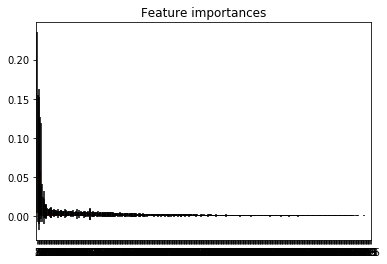

In [148]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(check_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(check_train.shape[1]), indices)
plt.xlim([-1, check_train.shape[1]])
plt.show()

In [125]:
check_train.columns[1]

'local12'

# Кросс-валидация

1) запустить отдельно стандартную кросс-валидацию без групшафл, с 15 сплитами, вывести confusion чего получилось
2) с групшафл тоже сделать 15 сплитов, для каждого сохраняя списки структур (как у тебя в ячейке 44, где middle check of shuffle) и confusion



In [135]:
#Стратегии проведения кросс-валидации
#KFold

for train_indices, test_indices in cross_validation.KFold(10, n_folds = 2, shuffle=True, random_state=0):
    print (train_indices, test_indices)

[0 3 5 6 7] [1 2 4 8 9]
[1 2 4 8 9] [0 3 5 6 7]


In [8]:
#используемая модель
rf_classifier_cv = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)

In [151]:
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=10)


In [152]:
#без групп
results = cross_val_score(rf_classifier_cv, triplexes_data, triplexes_target, cv=kf)

In [153]:
#Array of scores of the estimator for each run of the cross validation.
print(results)

[0.92388146 0.93463103 0.93695526 0.94509006 0.94334689 0.96338274
 0.95321128 0.9471084  0.9581517  0.96018599]


In [158]:
#с группами по pdb_chain
results_groups = cross_val_score(rf_classifier_cv, triplexes_data, triplexes_target, groups=list(triplexes.pdb_chain.values), cv=kf)

In [160]:
#REMARK ЗДЕСЬ ПОХОДУ ГРУППЫ НЕ РАБОТАЮТ

print(results_groups)

[0.92388146 0.93463103 0.93695526 0.94509006 0.94334689 0.96338274
 0.95321128 0.9471084  0.9581517  0.96018599]


# 5 ФОЛДОВ

In [189]:
kf = cross_validation.KFold(len(triplexes_target), n_folds=5)
for train_index, test_index in kf:
    X_train, X_test = triplexes_data.loc[train_index], triplexes_data.loc[test_index]
    y_train, y_test = triplexes_target.loc[train_index], triplexes_target.loc[test_index]
    rf_classifier_cv.fit(X_train, y_train)
    prediction_result = rf_classifier_cv.predict(X_test)
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, prediction_result))
    print("")
    print("REPORT")
    print(classification_report(y_test, prediction_result))
    print("ACCURACY", accuracy_score(y_test, prediction_result))
    print("-----------------")

CONFUSION MATRIX
[[5699  135]
 [ 341  708]]

REPORT
             precision    recall  f1-score   support

          0       0.94      0.98      0.96      5834
          1       0.84      0.67      0.75      1049

avg / total       0.93      0.93      0.93      6883

ACCURACY 0.9308441086735435
-----------------
CONFUSION MATRIX
[[5787   77]
 [ 339  680]]

REPORT
             precision    recall  f1-score   support

          0       0.94      0.99      0.97      5864
          1       0.90      0.67      0.77      1019

avg / total       0.94      0.94      0.94      6883

ACCURACY 0.9395612378323406
-----------------
CONFUSION MATRIX
[[5814   49]
 [ 274  746]]

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      5863
          1       0.94      0.73      0.82      1020

avg / total       0.95      0.95      0.95      6883

ACCURACY 0.953072788028476
-----------------
CONFUSION MATRIX
[[5785   60]
 [ 319  719]]

REPORT
          

In [264]:
gss = GroupShuffleSplit(n_splits=5, test_size=0.3)
# train_dataset_gss_1,test_dataset_gss_1 = next(gss.split(X=triplexes, y=triplexes['istriple'], groups=triplexes.pdb_chain.values))
# train_dataset_gss_2,test_dataset_gss_2 = next(gss.split(X=triplexes, y=triplexes['istriple'], groups=triplexes.pdb_chain.values))


for i in range(5):
    train_index, test_index = next(gss.split(X=triplexes, y=triplexes['istriple'], groups=triplexes.pdb_chain.values))
    X_train, X_test = triplexes_data.loc[list(train_index)], triplexes_data.loc[test_index]
    y_train, y_test = triplexes_target.loc[train_index], triplexes_target.loc[test_index]
    
    a = Counter(list(triplexes.loc[list(train_index)].pdb_chain.values))
    b = Counter(list(triplexes.loc[list(test_index)].pdb_chain.values))
    
    for key in a:
        if key in b.keys():
            print("FUUUUUUUUU")
    
    rf_classifier_cv.fit(X_train, y_train)
    prediction_result = rf_classifier_cv.predict(X_test)
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, prediction_result))
    print("")
    print("REPORT")
    print(classification_report(y_test, prediction_result))
    print("ACCURACY", accuracy_score(y_test, prediction_result))
    print("-----------------")

CONFUSION MATRIX
[[9153  116]
 [ 482 1117]]

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      9269
          1       0.91      0.70      0.79      1599

avg / total       0.94      0.94      0.94     10868

ACCURACY 0.9449760765550239
-----------------
CONFUSION MATRIX
[[8750   93]
 [ 445 1087]]

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      8843
          1       0.92      0.71      0.80      1532

avg / total       0.95      0.95      0.95     10375

ACCURACY 0.948144578313253
-----------------
CONFUSION MATRIX
[[9851  102]
 [ 530 1189]]

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      9953
          1       0.92      0.69      0.79      1719

avg / total       0.94      0.95      0.94     11672

ACCURACY 0.9458533241946538
-----------------
CONFUSION MATRIX
[[10516    92]
 [  569  1259]]

REPORT
      

# КРОСС-ВАЛИДАЦИЯ ПО ГРУППАМ KFoldGroup

In [7]:
from sklearn.model_selection import GroupKFold

In [201]:
#variant
# import scikitplot as skplt


# y_true = # ground truth labels
# y_probas = # predicted probabilities generated by sklearn classifier
# skplt.metrics.plot_roc_curve(y_true, y_probas)
# plt.show()

In [25]:
def probability_density(y_prob, y):
    
    kde1 = gaussian_kde(y_prob[y == 1])
    kde2 = gaussian_kde(y_prob[y == 0])
    
    x1 = np.linspace(np.min(y_prob[y == 1]),np.max(y_prob[y == 1]),500)
    x2 = np.linspace(np.min(y_prob[y == 0]),np.max(y_prob[y == 0]),500)
    
    try:
        treshold = brentq(lambda x : kde1(x) - kde2(x), x2[np.argmax(kde1(x1))], x1[np.argmax(kde2(x2))])
    except ValueError:
        treshold = 0.5
        
    plt.fill_between(x1,kde1(x1),0, color='darkblue', alpha = 0.5, label = 'Triplexes')
    plt.fill_between(x2,kde2(x2), 0, color='darkgrey', alpha = 0.5, label = 'Non-triplexes')
    plt.axvline(x1[np.argmax(kde1(x1))], color='black', linestyle='--', alpha = 0.5)
    plt.axvline(x2[np.argmax(kde2(x2))], color='black', linestyle='--', alpha = 0.5)
    plt.axvline(treshold, color='black', linestyle='-.', alpha = 0.7, label = str(round(treshold,2)))
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title('Probability Distributions')
    plt.xlabel('Probabilities')


# НА 5 ФОЛДАХ СТРОИМ CONFUSION MATRIX ПО КАЖДОЙ ГРУППЕ + ОБЩУЮ МАТРИЦУ. 

# ТАКЖЕ СТРОИМ ROC И СЧИТАЕМ AUC ДЛЯ TRAIN И TEST (ЧТОБЫ СРАВНИТЬ)

TEST_GROUPS Counter({'3j7q.cif1_5': 1319, '3j79.cif1_A': 965, '3j7p.cif1_S2': 766, '6ha1.cif1_a': 644, '4lfb.cif1_A': 584, '3j7a.cif1_A': 486, '5xyi.cif1_2': 429, '6d9j.cif1_2': 382, '1u6b.cif1_B': 70, '1nbs.cif1_B': 67, '2a64.cif1_A': 61, '4v9f.cif1_9': 59, '3pdr.cif1_X': 53, '6ek0.cif1_L7': 49, '4r4v.cif1_A': 44, '5fjc.cif1_A': 41, '6d90.cif1_4': 38, '1h4s.cif1_T': 33, '4aob.cif1_A': 33, '3iwn.cif1_A': 32, '4lck.cif1_F': 31, '2der.cif1_D': 30, '5e6m.cif1_C': 28, '3j79.cif1_C': 27, '1u0b.cif1_A': 26, '6az3.cif1_4': 26, '1qtq.cif1_B': 25, '3kfu.cif1_L': 25, '1n78.cif1_C': 24, '5l4o.cif1_A': 24, '2gdi.cif1_X': 23, '3ski.cif1_A': 22, '2qus.cif1_A': 21, '2xd0.cif1_W': 21, '3la5.cif1_A': 20, '4gcw.cif1_B': 20, '5ns3.cif1_C': 20, '1mzp.cif1_B': 19, '1qu2.cif1_T': 19, '4tue.cif1_QV': 19, '4lvw.cif1_A': 18, '4y1m.cif1_B': 18, '1mms.cif1_C': 17, '5e81.cif1_2K': 17, '1hc8.cif1_C': 16, '3icq.cif1_E': 16, '5e81.cif1_1K': 15, '1i6u.cif1_C': 12, '2zni.cif1_C': 12, '3k0j.cif1_E': 12, '4v7m.cif1_AY':

PROBA:  [0.59980654 0.40019346]

equal

type                             111
dssrs    A.A.1081.A.U.2701.A.A.3172.
bps                        cHS_cWW_-
dists                7.71_10.26_12.3
Name: 1974, dtype: object

PROBA:  [0.61265528 0.38734472]

equal


equal


equal


equal


equal


equal


equal

type                             111
dssrs    A.C.1246.A.G.1268.A.U.1282.
bps                        cWW_cSS_-
dists                10.57_6.48_8.73
Name: 1981, dtype: object

PROBA:  [0.56468628 0.43531372]

equal


equal

type                             111
dssrs    A.U.1256.A.U.3185.A.G.3222.
bps                        -_cWW_tW.
dists               9.16_10.86_11.59
Name: 1983, dtype: object

PROBA:  [0.56732197 0.43267803]

equal

type                             111
dssrs    A.A.1257.A.C.3184.A.A.3223.
bps                        -_cWW_tWS
dists               10.17_11.01_8.65
Name: 1984, dtype: object

PROBA:  [0.64702928 0.35297072]

equal


equal


equal


equal

type                



equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal



equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

type                           111
dssrs    A.A.11.A.A.1244.A.A.1402.
bps                    cWW_tSW_cWS
dists              12.05_8.99_5.59
Name: 2856, dtype: object

PROBA:  [0.95043668 0.04956332]

equal


equal


equal

type                         111
dssrs    A.U.32.A.A.474.A.A.601.
bps                    tWH_cWS_-
dists             9.64_9.18_8.43
Name: 2859, dtype: object

PROBA:  [0.74772033 0.25227967]

equal


equal

type                         111
dssrs    A.A.47.A.U.100.A.A.391.
bps                    cHS_cWW_-
dists            7.7_10.55_12.08
Name: 2861, dtype: object

PROBA:  [0.52451243 0.47548757]

equal


equal

type                         111
dssrs    A.A.61.A.C.270.A.G.292.
bps                  cWS_cWW_tW.
dists           6.17_10.96_12.89
Name: 2863, dtype: object

PROBA:  [0.66575204 0.33424796]

equal

type                         111
dss



equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

type                         111
dssrs    A.G.41.A.C.401.A.A.621.
bps                    cWW_cSS_-
dists           10.62_5.66_12.89
Name: 8297, dtype: object

PROBA:  [0.50221987 0.49778013]

equal


equal

type                         111
dssrs    A.A.51.A.U.114.A.C.314.
bps   


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

CONFUSION MATRIX By chain:  4lfb.cif1_A
[[499   1]
 [ 22  62]]



equal


equal


equal

type                       111
dssrs    B.G.8.B.U.48.B.C.101.
bps                cWW_tWS_cWW
dists           8.2_7.99_10.59
Name: 12542, dtype: object

PROBA:  [0.73807067 0.26192933]

equal

type                       111
dssrs    B.A.11.B.C.43.B.G.65.
bps                  -_cWW_tWS
dists          5.89_10.46_8.49
Name: 12543, dtype: object

PROBA:  [0.71981932 0.28018068]

equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

CONFUSION MATRIX By chain:  4y1m.cif1_B
[[15  0]
 [ 2  1]]



equal


equal

type                         111
dssrs    1K.U.8.1K.A.14.1K.A.21.
bps                  tWH_tWS_tSW
dists              9.7_10.8_8.66
Name: 14485, d

Name: 32863, dtype: object

PROBA:  [0.5410366 0.4589634]

equal


equal


equal


equal


equal


equal

type                             111
dssrs    a.A.1248.a.C.1305.a.A.1308.
bps                        tWW_-_cHW
dists              10.59_11.48_13.37
Name: 32869, dtype: object

PROBA:  [0.74789887 0.25210113]

equal

type                             111
dssrs    a.A.1259.a.G.1362.a.C.1378.
bps                        tWS_cWW_-
dists                10.38_10.75_9.8
Name: 32870, dtype: object

PROBA:  [0.55419057 0.44580943]

equal

type                             111
dssrs    a.G.1264.a.C.1268.a.G.1285.
bps                        cSS_cWW_-
dists               4.13_10.63_13.04
Name: 32871, dtype: object

PROBA:  [0.83196925 0.16803075]

equal

type                             111
dssrs    a.G.1277.a.A.1320.a.U.1335.
bps                        -_cWW_cSS
dists                12.53_10.6_5.66
Name: 32872, dtype: object

PROBA:  [0.59677614 0.40322386]

equal

type                          



equal


equal


equal


equal


equal

type                       111
dssrs    A.G.11.A.C.44.A.G.58.
bps                  cSS_cWW_-
dists         5.67_10.78_13.72
Name: 14593, dtype: object

PROBA:  [0.84730646 0.15269354]

equal

type                       111
dssrs    A.A.12.A.G.43.A.C.59.
bps                  cSS_cWW_-
dists          5.69_10.45_8.43
Name: 14594, dtype: object

PROBA:  [0.7865521 0.2134479]

equal


equal


equal


equal

type                       111
dssrs    A.A.24.A.U.64.A.A.85.
bps                  -_cWW_tWS
dists          9.81_10.55_9.31
Name: 14598, dtype: object

PROBA:  [0.90565259 0.09434741]

equal


equal

type                       100
dssrs    A.G.19.A.G.21.A.G.23.
bps                      -_-_-
dists         9.69_11.34_19.68
Name: 14600, dtype: object

PROBA:  [0.38891709 0.61108291]

equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

type                       112
dssrs    A.U.22.A.G.23.A.A.61.
bps                      -_



equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal




equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

type                          111
dssrs    2.A.10.2.A.952.2.A.1108.
bps                   cWW_tSW_cWS
dists              12.17_9.05_5.6
Name: 25367, dtype: object

PROBA:  [0.93284823 0.06715177]

equal


equal


equal


equal

type                         111
dssrs    2.U.30.2.A.399.2.A.516.
bps                    tWH_cWS_-
dists             9.59_9.51_8.37
Name: 25371, dtype: object

PROBA:  [0.68930447 0.31069553]

equal


equal

type                        111
dssrs    2.A.45.2.U.87.2.A.


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

type                       111
dssrs    5.C.28.5.G.29.5.C.53.
bps                  cWH_cWW_-
dists         6.01_10.18_13.53
Name: 4286, dtype: object

PROBA:  [0.61571658 0.38428342]

equal


equal


equal


equal


equal


equal


equal


equal


equal

type                          111
dssrs    5.C.126.5.G.127.5.C.141.
bps                     cWH_cWW_-
dists            6.22_10.27_13.67
Name: 4295, dtype: object

PROBA:  [0.70356126 0.29643874]

equal


equal

type                          111
dssrs    5.A.162.5.U.272.5.U.273.
bps                     cWW_-_cWW
dists            13.54_6.61_10.82
Name: 4297, dtype: object

PROBA:  [0.59263404 0.40736596]

equal


equal


equal


equal

type                          111
dssrs    5.U.206.5.A.208.5.G.232.
bps                     tSH_tSS

type                             111
dssrs    5.U.2519.5.A.2536.5.G.2640.
bps                        cWW_tSW_-
dists                10.35_9.36_9.94
Name: 4409, dtype: object

PROBA:  [0.84098038 0.15901962]

equal


equal

type                             111
dssrs    5.C.2558.5.C.2568.5.G.2569.
bps                        -_cWH_cWW
dists               13.54_5.62_10.68
Name: 4411, dtype: object

PROBA:  [0.72387026 0.27612974]

equal


equal

type                             111
dssrs    5.A.2581.5.C.2654.5.G.2680.
bps                        cSS_cWW_-
dists               5.06_10.48_12.41
Name: 4413, dtype: object

PROBA:  [0.6776582 0.3223418]

equal

type                             111
dssrs    5.C.2593.5.G.2752.5.C.4125.
bps                        cWW_cWH_-
dists               10.41_12.82_7.28
Name: 4414, dtype: object

PROBA:  [0.72107721 0.27892279]

equal

type                             111
dssrs    5.C.2604.5.G.2605.5.U.2734.
bps                        cWH_cWW_-
dists          


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal



equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

CONFUSION MATRIX By chain:  6d9j.cif1_2
[[327   0]
 [ 19  36]]



equal


equal


equal


equal


equal


equal


equal


equal

type                       111
dssrs    C.U.13.C.U.22.C.A.46.
bps                  cWW_tHW_-
dists         8.71_12.04_11.67
Name: 14446, dtype: object

PROBA:  [0.65200961 0.34799039]

equal


equal


equal


equal


equal


equal


equal


equal

type                      112
dssrs    C.G.9.C.U.11.C.C.23.
bps                   -_-_tHH
dists         8.9_13.76_11.98
Name: 14454, dtype: object

PROBA:  [0.35037093 0.64962907]

equal


equal


equal


equal


equal


equal

type                         0
dssrs    C.A.28.C.C.35.C.C.40.
bps                      -_-_-
dists        24.11_22.02_15.96
Name: 14460, dtype: object

PROBA:  [0.47087895 0.52912105]

equal


equal


equal


equal

type                      12

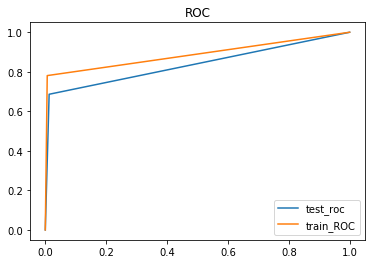


REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      5863
          1       0.90      0.69      0.78      1020

avg / total       0.94      0.94      0.94      6883

ACCURACY =  0.9427575185238994
-----------------
TEST_GROUPS Counter({'4v9f.cif1_0': 1153, '4ioa.cif1_X': 990, '5mrc.cif1_A': 831, '6d9j.cif1_5': 724, '5o5j.cif1_A': 574, '3jam.cif1_2': 506, '5mrc.cif1_aa': 418, '5t5h.cif1_A': 340, '4p95.cif1_A': 86, '1u9s.cif1_A': 69, '3igi.cif1_A': 63, '4gxy.cif1_A': 60, '5j7l.cif1_DB': 57, '5ml7.cif1_B': 50, '5xym.cif1_B': 47, '6ha1.cif1_B': 41, '4yaz.cif1_R': 38, '4oqu.cif1_A': 35, '4prf.cif1_B': 33, '1mfq.cif1_A': 32, '3hhn.cif1_E': 31, '3v7e.cif1_C': 30, '3u4m.cif1_B': 29, '3wqy.cif1_C': 27, '4qlm.cif1_A': 27, '1qf6.cif1_B': 26, '1fir.cif1_A': 25, '3d2v.cif1_A': 25, '4jrc.cif1_B': 25, '2du3.cif1_D': 24, '5mgp.cif1_x': 23, '1il2.cif1_C': 22, '5tbw.cif1_4': 22, '3amu.cif1_B': 21, '5t5h.cif1_C': 21, '3ivn.cif1_A': 20, '5wwt.cif1_C

type                             111
dssrs    0.A.1857.0.U.2246.0.A.2255.
bps                        cWS_cWW_-
dists                9.4_10.62_11.63
Name: 10516, dtype: object

PROBA:  [0.64446607 0.35553393]

equal


equal


equal


equal


equal

type                             111
dssrs    0.A.1910.0.G.2128.0.U.2265.
bps                        tSS_cWW_-
dists                8.01_10.34_7.58
Name: 10521, dtype: object

PROBA:  [0.71736587 0.28263413]

equal


equal


equal

type                             111
dssrs    0.G.1979.0.A.2624.0.U.2640.
bps                        -_cWW_cSS
dists               11.21_10.05_4.47
Name: 10524, dtype: object

PROBA:  [0.51377224 0.48622776]

equal


equal


equal

type                             111
dssrs    0.G.2072.0.A.2490.0.U.2531.
bps                        cSS_cWW_-
dists               4.53_10.68_13.17
Name: 10527, dtype: object

PROBA:  [0.78070816 0.21929184]

equal

type                             111
dssrs    0.C.2087.0.G.2657.0.A.2841

Name: 6725, dtype: object

PROBA:  [0.84563222 0.15436778]

equal


equal


equal


equal


equal


equal


equal


equal


equal

type                       112
dssrs    C.A.20.C.G.22.C.C.30.
bps                    -_cWW_-
dists         9.69_10.75_17.58
Name: 6734, dtype: object

PROBA:  [0.40203708 0.59796292]

equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

type                       123
dssrs    C.G.22.C.G.23.C.A.24.
bps                      -_-_-
dists          5.51_9.32_12.07
Name: 6747, dtype: object

PROBA:  [0.44551872 0.55448128]

equal


equal

CONFUSION MATRIX By chain:  3v7e.cif1_C
[[23  2]
 [ 2  3]]



equal


equal


equal

type                      111
dssrs    B.A.8.B.A.19.B.A.56.
bps                 -_tWW_tWH
dists       12.17_13.91_12.19
Name: 1435, dtype: object

PROBA:  [0.87739396 0.12260604]

equal

type                      111
dssrs    B.A.8.B.C.20.B.C.57.
bps               cWS_tWW_tW.
dists         7.37_9.



equal


equal


equal


equal


equal


equal


equal

CONFUSION MATRIX By chain:  3q50.cif1_A
[[7]]



equal


equal


equal


equal


equal


equal


equal


equal

CONFUSION MATRIX By chain:  1f1t.cif1_A
[[6 0]
 [0 2]]



equal


equal

type                          110
dssrs    D.G.913.D.C.919.D.U.921.
bps                       -_-_tSH
dists             21.14_12.1_9.97
Name: 1047, dtype: object

PROBA:  [0.47207922 0.52792078]

equal


equal

type                          111
dssrs    D.U.908.D.A.914.D.A.946.
bps                     tWH_t.W_-
dists            10.42_13.67_6.23
Name: 1049, dtype: object

PROBA:  [0.70052452 0.29947548]

equal


equal

type                          111
dssrs    D.G.909.D.G.913.D.U.921.
bps                     tHW_tSH_-
dists            11.31_9.97_12.28
Name: 1051, dtype: object

PROBA:  [0.51831033 0.48168967]

equal

type                          111
dssrs    D.G.916.D.U.920.D.A.958.
bps                     -_cHW_tSS
dists            10.53_12.84_8.



equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

CONFUSION MATRIX By chain:  5t5h.cif1_A
[[287   4]
 [ 16  33]]



equal


equal


equal


equal


equal


equal


equal


equal

type                      112
dssrs    C.A.9.C.C.13.C.A.23.
bps                   -_-_tHH
dists        11.17_8.58_11.12
Name: 23036, dtype: object

PROBA:  [0.49541924 0.50458076]

equal


equal


equal


equal


equal


equal


equal


equal


equal

type                     123
dssrs    C.U.8.C.A.9.C.G.46.
bps                    -_-_-
dists         8.05_5.34_7.48
Name: 23045, dtype: object

PROBA:  [0.3033333 0.6966667]

equal


equal


equal

CONFUSION MATRIX By chain:  5wwt.cif1_C
[[15  2]
 [ 0  3]]



equal


equal


equal

type                        111
dssrs    3.A.8.

type                             111
dssrs    5.G.2606.5.C.2667.5.C.2733.
bps                        cSW_-_cWW
dists                7.5_12.65_10.72
Name: 27523, dtype: object

PROBA:  [0.8229669 0.1770331]

equal


equal


equal


equal


equal

type                             111
dssrs    5.A.3611.5.A.5016.5.G.5033.
bps                        cSS_tWS_-
dists               5.59_10.25_15.13
Name: 27528, dtype: object

PROBA:  [0.84341582 0.15658418]

equal


equal


equal


equal


equal


equal


equal


equal

type                             111
dssrs    5.C.3893.5.G.4567.5.A.4979.
bps                        cWW_-_cSW
dists               10.73_12.63_9.94
Name: 27536, dtype: object

PROBA:  [0.56618604 0.43381396]

equal


equal


equal


equal


equal

type                             111
dssrs    5.G.3918.5.U.4190.5.U.4383.
bps                        -_cWH_cWW
dists              16.28_11.14_10.76
Name: 27541, dtype: object

PROBA:  [0.51801378 0.48198622]

equal


equal


equal


e



equal


equal


equal


equal

type                       111
dssrs    A.A.14.A.G.37.A.C.44.
bps                  tWS_cWW_-
dists         9.42_10.92_11.33
Name: 1684, dtype: object

PROBA:  [0.53096012 0.46903988]

equal

type                       111
dssrs    A.G.39.A.U.42.A.C.65.
bps                  tSW_-_cWW
dists          7.83_8.37_10.74
Name: 1685, dtype: object

PROBA:  [0.88554515 0.11445485]

equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

type                         0
dssrs    A.G.23.A.U.25.A.A.26.
bps                      -_-_-
dists         10.43_7.33_17.23
Name: 1696, dtype: object

PROBA:  [0.4720005 0.5279995]

equal


equal


equal


equal

CONFUSION MATRIX By chain:  3ivn.cif1_A
[[16  1]
 [ 2  1]]



equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

type                         112
dssrs    X.A.43.X.U.447.X.A.536.
bps                      cWW_-_-
dists           10.23_81.2_88.35
Name: 7470, dtype: object

PR



equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

CONFUSION MATRIX By chain:  5mgp.cif1_x
[[19  0]
 [ 0  4]]


type                             110
dssrs    B.G.2165.B.U.2167.B.A.2171.
bps                          -_tWH_-
dists               10.45_9.69_11.87
Name: 6690, dtype: object

PROBA:  [0.27159491 0.72840509]

equal


equal


equal


equal

type                             111
dssrs    B.C.2111.B.U.2144.B.G.2147.
bps                        -_tSW_cWH
dists                 9.91_9.42_8.55
Name: 6694, dtype: object

PROBA:  [0.76736352 0.23263648]

equal

type                             111
dssrs    B.A.2114.B.A.2119.B.G.2168.
bps                        tWH_tWS_-
dists                12.08_9.93_6.11
Name: 6695, dtype: object

PROBA:  [0.70043677 0.29956323]

equal

type                             111
dssrs    B.G.2115.B.U.2167.B.A.2171.
bps        

type                            110
dssrs    A.U.203.A.G.1683.A.C.1695.
bps                         -_cWW_-
dists             81.45_10.84_85.75
Name: 16832, dtype: object

PROBA:  [0.4888985 0.5111015]

equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

type                         111
dssrs    A.U.31.A.U.34.A.A.3271.
bps                  cWH_cWW_cW.
dists          10.06_10.47_13.51
Name: 16856, dtype: object

PROBA:  [0.51283097 0.48716903]

equal

type                          111
dssrs    A.G.112.A.C.146.A.A.157.
bps                     cWW_-_tSS
dists              10.8_5.79_8.25
Name: 16857, dtype: object

PROBA:  [0.67828758 0.32171242]

equal


equal


equal

type                           111
dssrs    A.G.227.A.C.249.A.A.1386.
bps                      cWW_-_cSW
dists             10.78_12.96_6.82
Name: 16860, dtype: object

PROBA:  [0.5705201

equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal





equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal




equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

CONFUSION MATRIX By chain:  5o5j.cif1_A
[[490   2]
 [ 19  63]]



equal


equal

type                         111
dssrs    bb.U.8.bb.G.22.bb.G.46.
bps                    -_tHW_cSW
dists            11.68_11.3_7.03
Name: 17569, dtype:

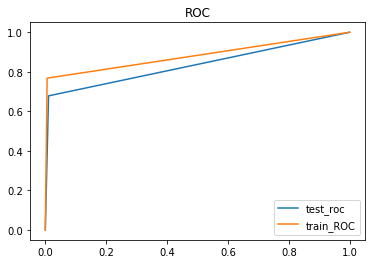


REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      5870
          1       0.92      0.68      0.78      1013

avg / total       0.94      0.94      0.94      6883

ACCURACY =  0.9434839459537993
-----------------
TEST_GROUPS Counter({'4y4o.cif1_2A': 1112, '6eri.cif1_AA': 1013, '5tbw.cif1_1': 937, '4v88.cif1_A6': 639, '5ool.cif1_A': 568, '6eri.cif1_BA': 540, '6az3.cif1_1': 397, '3j9m.cif1_AA': 318, '5oql.cif1_1': 155, '5fdv.cif1_1B': 67, '4wf9.cif1_Y': 60, '3j79.cif1_B': 57, '5xy3.cif1_3': 52, '5tbw.cif1_AS': 48, '3ivk.cif1_M': 43, '1c0a.cif1_B': 38, '4qk8.cif1_A': 36, '3f2x.cif1_X': 33, '4yye.cif1_C': 33, '5lys.cif1_B': 32, '4uyk.cif1_R': 30, '4rdx.cif1_C': 28, '1j1u.cif1_B': 27, '5hr7.cif1_D': 27, '5aj0.cif1_Bv': 26, '6d9j.cif1_8': 26, '2azx.cif1_D': 25, '4mgn.cif1_B': 24, '5axm.cif1_P': 24, '1evv.cif1_A': 23, '5ool.cif1_B': 23, '4qei.cif1_C': 22, '3d0u.cif1_A': 21, '5zwn.cif1_P': 21, '2xdb.cif1_G': 20, '3w3s.cif1_B': 20, '5ju

PROBA:  [0.71174262 0.28825738]

equal

type                          112
dssrs    A.G.208.A.C.218.A.C.221.
bps                       -_-_cWW
dists           17.55_13.87_10.55
Name: 64, dtype: object

PROBA:  [0.49336712 0.50663288]

equal

type                          112
dssrs    A.G.207.A.C.221.A.A.225.
bps                         -_-_-
dists             13.92_5.7_12.77
Name: 65, dtype: object

PROBA:  [0.48986993 0.51013007]

equal


equal


equal


equal


equal


equal


equal


equal


equal

CONFUSION MATRIX By chain:  1et4.cif1_A
[[10  2]
 [ 1  2]]



equal


equal


equal


equal


equal


equal


equal


equal

type                      112
dssrs    G.G.3.G.C.15.G.A.20.
bps                 -_cSS_tSS
dists          7.46_3.86_8.19
Name: 1233, dtype: object

PROBA:  [0.43805523 0.56194477]

equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

CONFUSION MATRIX By chain:  2xdb.cif1_G
[[15  1]
 [ 0  4]]



equal


equal

type             


equal


equal

type                                112
dssrs    A6.C.1161.A6.U.1617.A6.C.1619.
bps                           -_cSH_cSW
dists                    8.08_9.07_7.39
Name: 9795, dtype: object

PROBA:  [0.27588503 0.72411497]

equal


equal


equal


equal


equal


equal

type                                112
dssrs    A6.A.1275.A6.G.1278.A6.U.1430.
bps                             -_cWW_-
dists                 16.13_10.55_15.67
Name: 9801, dtype: object

PROBA:  [0.37457165 0.62542835]

equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


e



equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

CONFUSION MATRIX By chain:  3j9m.cif1_AA
[[272   0]
 [ 10  36]]



equal


equal


equal


equal


equal


equal

type                       111
dssrs    B.A.34.B.C.38.B.G.69.
bps                  -_cWW_tWH
dists         13.12_10.7_12.06
Name: 16583, dtype: object

PROBA:  [0.76064964 0.23935036]

equal


equal


equal


equal


equal


equal


equal

type                       112
dssrs    B.U.40.B.U.66.B.C.67.
bps                      -_-_-
dists         14.95_5.19_12.93
Name: 16590, dtype: object

PROBA:  [0.38931725 0.61068275]

equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

CONFUSION MAT

type                          111
dssrs    P.C.372.P.C.373.P.G.445.
bps                     cWH_-_cWW
dists              7.1_8.82_10.46
Name: 25803, dtype: object

PROBA:  [0.56285509 0.43714491]

equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

CONFUSION MATRIX By chain:  5zwn.cif1_P
[[18  0]
 [ 2  1]]


type                       111
dssrs    B.A.21.B.U.48.B.U.75.
bps                tW._cWS_cWW
dists         10.92_6.06_10.56
Name: 20915, dtype: object

PROBA:  [0.77075255 0.22924745]

equal


equal

CONFUSION MATRIX By chain:  5swd.cif1_B
[[1 0]
 [1 0]]



equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

type                           110
dssrs    1.G.641.1.A.688.1.U.1531.




equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

type                             110
dssrs    2A.A.199.2A.U.826.2A.G.831.
bps                          -_cWW_-
dists              24.03_10.29_25.64
Name: 12622, dtype: object

PROBA:  [0.39334111 0.60665889]

equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


Name: 12815, dtype: object

PROBA:  [0.52746164 0.47253836]

equal

type                                111
dssrs    2A.C.1631.2A.G.1635.2A.A.1760.
bps                           cWW_-_tSW
dists                  10.65_11.02_9.11
Name: 12816, dtype: object

PROBA:  [0.70341094 0.29658906]

equal


equal

type                                111
dssrs    2A.C.1660.2A.G.2000.2A.U.2689.
bps                           cWW_cSW_-
dists                    10.53_7.8_11.2
Name: 12818, dtype: object

PROBA:  [0.57369187 0.42630813]

equal


equal


equal


equal


equal


equal

type                                111
dssrs    2A.U.1709.2A.A.1749.2A.G.2859.
bps                           cWW_-_cSS
dists                    10.4_12.4_5.48
Name: 12824, dtype: object

PROBA:  [0.65334063 0.34665937]

equal

type                                111
dssrs    2A.C.1754.2A.A.2693.2A.U.2716.
bps                           -_cWW_cWS
dists                  11.92_10.38_8.05
Name: 12825, dtype: object

PROBA:  [0.6

equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal





equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal



type                             111
dssrs    A.A.1718.A.C.1911.A.G.2008.
bps                        cSS_cWW_-
dists                5.7_10.53_12.44
Name: 20230, dtype: object

PROBA:  [0.6530949 0.3469051]

equal

type                             111
dssrs    A.G.1719.A.C.1910.A.G.2009.
bps                        -_cWW_tSS
dists                6.16_10.68_7.77
Name: 20231, dtype: object

PROBA:  [0.7208409 0.2791591]

equal


equal


equal

type                             111
dssrs    A.C.1726.A.G.1748.A.A.2919.
bps                        cWW_tSH_-
dists               10.56_6.69_11.86
Name: 20234, dtype: object

PROBA:  [0.82827244 0.17172756]

equal

type                             111
dssrs    A.U.1738.A.U.1759.A.G.1888.
bps                        cWW_-_tSW
dists                  8.94_8.57_8.5
Name: 20235, dtype: object

PROBA:  [0.75104728 0.24895272]

equal


equal

type                             111
dssrs    A.C.1769.A.C.2276.A.G.2289.
bps                        -_cWW_tWS
dists


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

CONFUSION MATRIX By chain:  5ool.cif1_A
[[481   5]
 [ 22  60]]



equal


equal

type                                111
dssrs    EC.U.6787.EC.G.6808.EC.G.6809.
bps                         c.W_cSH_cWH
dists                  13.11_7.44_11.33
Name: 16508, dtype: object

PROBA:  [0.643552 0.356448]

equal

type                                111
dssrs    EC.A.6790.EC.C.6850.EC.G.6878.
bps                           -_cWW_tSS
dists                    6.86_10.8_5.92
Name: 16509, dtype: object

PROBA:  [0.83608166 0.16391834]

equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

CONFUSION MATRIX By chain:  5jup.cif1_EC
[[17  0]
 [ 2  1]]



equal


equal


equal


equal


equal

type                       111
dssrs    X.G.11.X.C.31.X.G.84.
bps                  cSS_cWW_-
dists          5.28_10.66_12.6
Name: 1477, dtype: object

PROBA:

type                             111
dssrs    1.U.1649.1.A.1806.1.U.2558.
bps                        cWW_-_cSW
dists                10.5_11.09_5.89
Name: 22140, dtype: object

PROBA:  [0.7616297 0.2383703]

equal

type                             111
dssrs    1.G.1662.1.U.1722.1.A.1787.
bps                        cSW_-_cWW
dists               7.74_13.98_12.61
Name: 22141, dtype: object

PROBA:  [0.67614966 0.32385034]

equal

type                             111
dssrs    1.G.1713.1.G.1727.1.A.1731.
bps                        -_cSS_tSH
dists                 11.57_3.84_9.7
Name: 22142, dtype: object

PROBA:  [0.70148983 0.29851017]

equal

type                             111
dssrs    1.U.1862.1.G.1868.1.C.2118.
bps                        cWW_cSS_-
dists                10.79_5.75_9.98
Name: 22143, dtype: object

PROBA:  [0.68871222 0.31128778]

equal


equal

type                             111
dssrs    1.G.1892.1.C.2343.1.U.3079.
bps                        cWW_-_cSH
dists              


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

type    

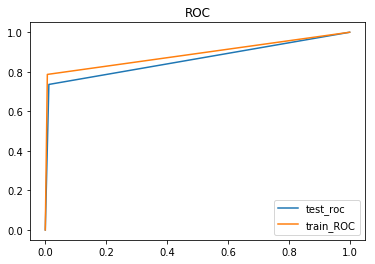


REPORT
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      5868
          1       0.92      0.74      0.82      1015

avg / total       0.95      0.95      0.95      6883

ACCURACY =  0.9510387912247567
-----------------
TEST_GROUPS Counter({'5j7l.cif1_DA': 1103, '6ha1.cif1_A': 1028, '5xxb.cif1_1': 842, '5xy3.cif1_1': 762, '6ek0.cif1_S2': 550, '5xxu.cif1_2': 472, '5ngm.cif1_Aa': 462, '5t5h.cif1_B': 283, '6gaz.cif1_AA': 279, '3j7o.cif1_7': 59, '3mxh.cif1_R': 52, '5t5h.cif1_D': 48, '4plx.cif1_A': 44, '4ycp.cif1_B': 40, '2qwy.cif1_C': 37, '2r8s.cif1_R': 33, '4wj4.cif1_B': 33, '5wt1.cif1_C': 32, '4y1j.cif1_A': 30, '4yco.cif1_D': 29, '5ccb.cif1_N': 28, '3wfs.cif1_A': 27, '6az3.cif1_5': 26, '6ck5.cif1_A': 26, '3al0.cif1_E': 25, '4v8n.cif1_CV': 25, '6eri.cif1_AB': 24, '5d8h.cif1_A': 23, '6gaw.cif1_BB': 23, '5nwq.cif1_A': 22, '5hr6.cif1_C': 21, '5oql.cif1_2': 21, '1ser.cif1_T': 20, '3g9c.cif1_Q': 20, '5xy3.cif1_4': 20, '1b23.cif1_R': 19, '2d6f

PROBA:  [0.64951726 0.35048274]

equal


equal

type                            111
dssrs    1.U.687.1.G.2068.1.C.2081.
bps                       cHS_cWW_-
dists             10.74_11.03_11.26
Name: 24611, dtype: object

PROBA:  [0.67173831 0.32826169]

equal

type                            111
dssrs    1.A.689.1.C.1925.1.G.2270.
bps                       -_cWW_cWS
dists              12.34_10.84_9.33
Name: 24612, dtype: object

PROBA:  [0.81402167 0.18597833]

equal

type                            111
dssrs    1.A.689.1.U.1926.1.C.2269.
bps                       cHS_cWW_-
dists                7.93_9.8_12.29
Name: 24613, dtype: object

PROBA:  [0.79625032 0.20374968]

equal


equal


equal


equal


equal


equal

type                           111
dssrs    1.G.850.1.C.856.1.G.2072.
bps                      cWW_-_tSW
dists              11.0_8.84_11.68
Name: 24619, dtype: object

PROBA:  [0.59576873 0.40423127]

equal

type                            111
dssrs    1.A.853.1.U.2282.1.G.23



equal


equal

type                      111
dssrs    A.G.6.A.C.50.A.A.65.
bps                 cWW_-_tSS
dists         10.81_5.64_8.12
Name: 9092, dtype: object

PROBA:  [0.62555979 0.37444021]

equal

type                      111
dssrs    A.U.7.A.U.47.A.A.66.
bps                 -_cWW_cWH
dists        14.81_10.03_8.36
Name: 9093, dtype: object

PROBA:  [0.7601783 0.2398217]

equal

type                      111
dssrs    A.U.8.A.U.46.A.A.67.
bps                 -_cWW_cWH
dists          15.12_10.6_8.3
Name: 9094, dtype: object

PROBA:  [0.70634317 0.29365683]

equal

type                      111
dssrs    A.U.9.A.U.45.A.A.68.
bps                 -_cWW_cWH
dists        15.06_10.77_8.02
Name: 9095, dtype: object

PROBA:  [0.66113903 0.33886097]

equal

type                       111
dssrs    A.U.10.A.U.44.A.A.69.
bps                  -_cWW_cWH
dists         14.97_10.79_7.76
Name: 9096, dtype: object

PROBA:  [0.71175323 0.28824677]

equal

type                       111
dssrs    A.U.11



equal


equal

CONFUSION MATRIX By chain:  1xjr.cif1_A
[[1 0]
 [0 1]]



equal

type                       110
dssrs    7.C.30.7.C.34.7.C.46.
bps                    -_cWS_-
dists         17.46_7.49_13.66
Name: 3272, dtype: object

PROBA:  [0.41118801 0.58881199]

equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

type                       100
dssrs    7.C.36.7.C.39.7.U.43.
bps                      -_-_-
dists        17.38_13.45_13.08
Name: 3296, dtype: object

PROBA:  [0.33274617 0.66725383]

equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

CONFUSION MATRIX By chain:  3j7o.cif1_7
[[48  2]
 [ 0  9]]


type                      1

type                             111
dssrs    S2.G.411.S2.C.429.S2.A.811.
bps                        cWW_cSW_-
dists               10.63_9.36_12.41
Name: 29688, dtype: object

PROBA:  [0.75648938 0.24351062]

equal

type                             111
dssrs    S2.G.412.S2.G.425.S2.A.812.
bps                        tHS_-_tSW
dists               10.62_18.81_9.49
Name: 29689, dtype: object

PROBA:  [0.59643639 0.40356361]

equal


equal


equal


equal


equal


equal


equal


equal

type                               111
dssrs    S2.A.628.S2.U.1329.S2.G.1500.
bps                          -_cWW_cWS
dists                 14.07_11.13_9.93
Name: 29697, dtype: object

PROBA:  [0.7580054 0.2419946]

equal


equal


equal

type                             111
dssrs    S2.C.746.S2.G.796.S2.A.798.
bps                        cWW_-_cSW
dists               10.58_11.21_8.76
Name: 29700, dtype: object

PROBA:  [0.53030672 0.46969328]

equal


equal


equal


equal


equal

type                      



equal


equal

type                        111
dssrs    R.4SU.8.R.A.14.R.A.46.
bps                 tWH_t.W_cSS
dists          10.04_12.76_4.86
Name: 2, dtype: object

PROBA:  [0.70260438 0.29739562]

equal

type                        111
dssrs    R.4SU.8.R.G.15.R.G.48.
bps                   -_t.W_cSS
dists          12.32_13.49_4.06
Name: 3, dtype: object

PROBA:  [0.77432732 0.22567268]

equal

type                      111
dssrs    R.A.9.R.A.13.R.A.22.
bps                 tHW_tSH_-
dists        11.7_10.01_13.84
Name: 4, dtype: object

PROBA:  [0.51455444 0.48544556]

equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

type                       123
dssrs    R.A.14.R.G.15.R.A.22.
bps                      -_-_-
dists           5.15_7.01_6.62
Name: 16, dtype: object

PROBA:  [0.39459018 0.60540982]

equal

type                       123
dssrs    R.4SU.8.R.A.9.R.A.46.
bps                    -_-_cSS
dists           6.81_4.24_4.86
Name: 17, dtyp

type                          111
dssrs    DA.U.62.DA.A.64.DA.U.90.
bps                     cWH_cWW_-
dists             9.0_10.61_12.96
Name: 14918, dtype: object

PROBA:  [0.59837167 0.40162833]

equal

type                            111
dssrs    DA.G.80.DA.C.106.DA.A.294.
bps                       cWW_-_tSS
dists                10.64_5.9_8.13
Name: 14919, dtype: object

PROBA:  [0.67115736 0.32884264]

equal


equal


equal


equal


equal


equal


equal

type                             111
dssrs    DA.U.200.DA.G.250.DA.G.386.
bps                        tWW_-_cWW
dists               10.94_13.13_8.08
Name: 14926, dtype: object

PROBA:  [0.55031612 0.44968388]

equal


equal


equal


equal

type                              111
dssrs    DA.C.228.DA.U.416.DA.A.2407.
bps                         -_cWW_cHS
dists                12.29_10.66_7.66
Name: 14930, dtype: object

PROBA:  [0.64737916 0.35262084]

equal


equal


equal

type                             111
dssrs    DA.G.245.DA.C.

equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal




type                             111
dssrs    1.A.1390.1.C.2996.1.G.3048.
bps                        -_cWW_tW.
dists               5.34_10.79_12.19
Name: 23315, dtype: object

PROBA:  [0.60814547 0.39185453]

equal


equal


equal


equal

type                             111
dssrs    1.A.1565.1.U.1983.1.A.2465.
bps                        cWS_cWW_-
dists               9.87_10.45_11.89
Name: 23319, dtype: object

PROBA:  [0.60437567 0.39562433]

equal


equal


equal


equal


equal

type                             111
dssrs    1.U.1630.1.A.1681.1.A.1899.
bps                        tWH_tWW_-
dists               9.83_13.61_10.27
Name: 23324, dtype: object

PROBA:  [0.59844779 0.40155221]

equal

type                             111
dssrs    1.U.1641.1.U.1646.1.A.2280.
bps                        cWW_tWW_-
dists              10.21_10.44_10.02
Name: 23325, dtype: object

PROBA:  [0.6692516 0.3307484]

equal


equal


equal

type                             111
dssrs    1.A.1741.1.G.1910.1.

[[14  3]
 [ 1  3]]



equal


equal


equal


equal

CONFUSION MATRIX By chain:  5xh7.cif1_B
[[4]]



equal


equal


equal


equal


equal

type                       111
dssrs    A.G.17.A.A.43.A.A.87.
bps                  cWW_-_cSW
dists         13.48_14.27_9.97
Name: 27284, dtype: object

PROBA:  [0.71838838 0.28161162]

equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

CONFUSION MATRIX By chain:  6ck5.cif1_A
[[22  0]
 [ 1  3]]



equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal



equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

type                             112
dssrs    A.C.2076.A.U.2478.A.G.2650.
bps                          -_-_cWW
dists              51.87_51.05_10.66
Name: 33966, dtype: object

PROBA:  [0.49607439 0.50392561]

equal


equal




equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

CONFUSION MATRIX By chain:  5ngm.cif1_Aa
[[395   1]
 [ 13  53]]



equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

type                           111
dssrs    2.C.13.2.A.1081.2.G.1136.
bps                      -_tWS_cWW
dists              5.82_8.59_10.69
Name: 24068, dtyp



equal


equal

type                      111
dssrs    B.A.7.B.U.26.B.A.27.
bps                 cWW_cSH_-
dists        10.64_5.96_12.64
Name: 9397, dtype: object

PROBA:  [0.68309189 0.31690811]

equal

type                      111
dssrs    B.C.9.B.G.24.B.A.31.
bps                 cWW_cSW_-
dists        10.88_9.88_11.02
Name: 9398, dtype: object

PROBA:  [0.6847549 0.3152451]

equal

type                       111
dssrs    B.A.10.B.U.23.B.A.31.
bps                  cWW_-_tSW
dists          10.7_13.33_8.87
Name: 9399, dtype: object

PROBA:  [0.66568502 0.33431498]

equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

CONFUSION MATRIX By chain:  4rmo.cif1_B
[[14  0]
 [ 3  0]]



equal


equal


equal


equal

type                       111
dssrs    A.A.10.A.C.37.A.G.61.
bps                  -_cWW_tSS
dists          5.74_10.54_8.02
Name: 12513, dtype: object

PROBA:  [0.65943395 0.34056605]

equal


equal


equal


equal


equal


equal


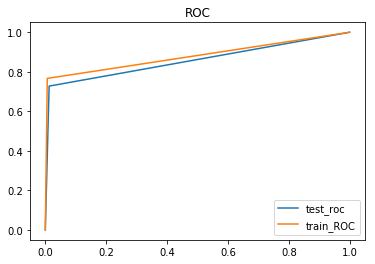


REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      5870
          1       0.91      0.73      0.81      1013

avg / total       0.95      0.95      0.95      6883

ACCURACY =  0.9491500799070173
-----------------
TEST_GROUPS Counter({'5o60.cif1_A': 1041, '6ek0.cif1_L5': 1041, '4wf9.cif1_X': 943, '5j7l.cif1_AA': 651, '6az1.cif1_1': 585, '6gaw.cif1_BA': 543, '5an9.cif1_N': 413, '6az3.cif1_2': 286, '5t2a.cif1_B': 252, '4ioa.cif1_Y': 60, '5xxb.cif1_3': 55, '6az3.cif1_8': 51, '4kqy.cif1_A': 45, '6eri.cif1_Ax': 43, '1yfg.cif1_A': 38, '5t83.cif1_A': 34, '6d9j.cif1_7': 33, '3ndb.cif1_M': 32, '4pr6.cif1_B': 32, '4mgn.cif1_A': 30, '4qk9.cif1_A': 28, '6cb3.cif1_B': 27, '6gaz.cif1_AV': 27, '4p5j.cif1_A': 26, '5u3g.cif1_B': 26, '3dil.cif1_A': 25, '3eph.cif1_E': 24, '3skl.cif1_B': 24, '2csx.cif1_C': 23, '3q3z.cif1_V': 23, '5o2r.cif1_x': 22, '3jbv.cif1_W': 21, '3j7q.cif1_8': 20, '5mmm.cif1_z': 20, '5xxb.cif1_4': 20, '6ek0.cif1_L8': 20, '1gax.

type                                111
dssrs    L5.U.2447.L5.A.2511.L5.A.2743.
bps                           tWH_tWW_-
dists                    9.63_13.6_9.81
Name: 28767, dtype: object

PROBA:  [0.74122751 0.25877249]

equal


equal

type                                111
dssrs    L5.C.2458.L5.G.2463.L5.G.3671.
bps                           cWW_-_cSS
dists                  10.43_12.64_5.64
Name: 28769, dtype: object

PROBA:  [0.51972276 0.48027724]

equal


equal


equal

type                                111
dssrs    L5.C.2520.L5.G.2535.L5.G.2640.
bps                           cWW_-_cSS
dists                   10.7_11.56_5.76
Name: 28772, dtype: object

PROBA:  [0.70071796 0.29928204]

equal

type                                  111
dssrs    L5.7MG.2522.L5.C.2533.L5.G.2711.
bps                             cWW_-_cSW
dists                   10.99_10.24_10.39
Name: 28773, dtype: object

PROBA:  [0.76332224 0.23667776]

equal


equal


equal


equal


equal

type                    


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal



equal


equal


equal

type                             111
dssrs    X.C.2074.X.G.2648.X.A.2843.
bps                        cWW_-_cSW
dists               10.72_11.64_9.89
Name: 11667, dtype: object

PROBA:  [0.56236467 0.43763533]

equal


equal

type                             111
dssrs    X.A.2081.X.A.2604.X.U.2642.
bps                        tHW_-_cWW
dists              12.12_13.79_11.06
Name: 11669, dtype: object

PROBA:  [0.51567 0.48433]

equal


equal


equal


equal


equal


equal


equal


equal

type                             111
dssrs    X.C.2288.X.G.2306.X.A.2354.
bps                      cWW_cSS_tSW
dists                10.48_5.97_8.27
Name: 11677, dtype: object

PROBA:  [0.69797252 0.30202748]

equal

type                             111
dssrs    X.C.2310.X.G.2352.X.A.2411.
bps                      cWW_cHH_...
dists               10.47_10.6_14.24
Name: 11678, dtype: object

PROBA:  [0.96289024 0.03710976]

equal


equal


equal


equal


equal


equal


equal


equal


type                             111
dssrs    N.C.1459.N.C.1519.N.G.3452.
bps                      t.W_c.W_cWH
dists               11.73_9.48_10.12
Name: 13938, dtype: object

PROBA:  [0.76940726 0.23059274]

equal


equal


equal


equal


equal

type                             111
dssrs    N.A.1537.N.G.3164.N.C.3190.
bps                      cW._cWW_cHS
dists                12.8_10.66_8.15
Name: 13943, dtype: object

PROBA:  [0.50442239 0.49557761]

equal


equal


equal


equal


equal


equal


equal

type                             111
dssrs    N.A.2480.N.G.2695.N.C.2933.
bps                        t.S_cWW_-
dists                8.04_10.79_7.14
Name: 13950, dtype: object

PROBA:  [0.71455369 0.28544631]

equal

type                             111
dssrs    N.A.2499.N.C.2693.N.G.2935.
bps                        -_cWW_tSS
dists                6.96_10.62_8.46
Name: 13951, dtype: object

PROBA:  [0.7037303 0.2962697]

equal

type                             111
dssrs    N.A.2547.N.A


equal


equal

CONFUSION MATRIX By chain:  5c45.cif1_X
[[1 0]
 [0 1]]



equal


equal


equal


equal

CONFUSION MATRIX By chain:  4pcj.cif1_A
[[3 0]
 [0 1]]



equal


equal


equal


equal

type                            100
dssrs    B.A.914.B.H2U.916.B.G.918.
bps                           -_-_-
dists              13.51_9.61_17.25
Name: 109, dtype: object

PROBA:  [0.41518578 0.58481422]

equal


equal


equal


equal


equal


equal


equal

CONFUSION MATRIX By chain:  1f7u.cif1_B
[[8 1]
 [0 2]]



equal


equal

type                       110
dssrs    W.G.44.W.G.50.W.A.51.
bps                      -_-_-
dists          26.0_5.85_29.95
Name: 6261, dtype: object

PROBA:  [0.4397365 0.5602635]

equal

type                      111
dssrs    W.U.8.W.G.15.W.C.48.
bps                 tWH_-_cSS
dists        10.79_10.23_4.62
Name: 6262, dtype: object

PROBA:  [0.92967877 0.07032123]

equal

type                       111
dssrs    W.G.10.W.C.25.W.G.45.
bps                  cWW_-_cHS
dists 


equal


equal


equal


equal


equal

type                             111
dssrs    1.G.1660.1.C.1669.1.G.1801.
bps                        cWW_cSS_-
dists               10.68_5.61_12.74
Name: 25971, dtype: object

PROBA:  [0.60584305 0.39415695]

equal

type                             111
dssrs    1.G.1661.1.C.1668.1.G.1801.
bps                        cWW_-_tSW
dists              10.84_10.51_10.07
Name: 25972, dtype: object

PROBA:  [0.59507219 0.40492781]

equal

type                             111
dssrs    1.A.1696.1.U.1779.1.A.1933.
bps                        cWW_cSW_-
dists                9.95_9.85_10.92
Name: 25973, dtype: object

PROBA:  [0.88805201 0.11194799]

equal


equal


equal


equal


equal

type                             111
dssrs    1.A.1884.1.G.2010.1.U.2026.
bps                        tWS_cWW_-
dists                10.18_10.9_9.62
Name: 25978, dtype: object

PROBA:  [0.77845823 0.22154177]

equal

type                             111
dssrs    1.A.1941.1.C.2009.

equal

type                             111
dssrs    A.G.1642.A.A.1715.A.C.1797.
bps                        tSW_-_cWW
dists                 10.41_9.8_10.8
Name: 19342, dtype: object

PROBA:  [0.62663694 0.37336306]

equal


equal

type                             111
dssrs    A.U.1671.A.A.1673.A.A.1682.
bps                        cSH_-_cWW
dists               8.01_13.13_11.14
Name: 19344, dtype: object

PROBA:  [0.5650658 0.4349342]

equal

type                             111
dssrs    A.U.1695.A.G.1738.A.C.1949.
bps                        -_cWW_cSH
dists               12.74_10.35_8.77
Name: 19345, dtype: object

PROBA:  [0.77765998 0.22234002]

equal

type                             111
dssrs    A.G.1878.A.C.2224.A.U.2913.
bps                        cWW_-_...
dists               10.66_7.78_11.62
Name: 19346, dtype: object

PROBA:  [0.5852902 0.4147098]

equal


equal


equal


equal


equal


equal

type                             111
dssrs    A.C.1927.A.G.1966.A.A.3080.
bps        



equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

type                            111
dssrs    AA.U.37.AA.A.397.AA.A.547.
bps                       tWW_cHS_-
dists               11.19_7.63_8.76
Name: 15954, dtype: object

PROBA:  [0.58667189 0.41332811]

eq



equal


equal


equal


equal


equal

type                          111
dssrs    2.G.396.2.U.432.2.A.559.
bps                     cWW_cSS_-
dists             10.37_4.71_12.2
Name: 26886, dtype: object

PROBA:  [0.64644564 0.35355436]

equal


equal


equal


equal

type                              111
dssrs    2.A2M.527.2.A.1397.2.U.1413.
bps                         -_cWW_cSS
dists                 11.2_10.17_4.46
Name: 26890, dtype: object

PROBA:  [0.58155103 0.41844897]

equal


equal


equal


equal

type                            111
dssrs    2.A.619.2.G.1263.2.U.1304.
bps                       cSS_cWW_-
dists              5.02_10.92_13.58
Name: 26894, dtype: object

PROBA:  [0.67798242 0.32201758]

equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

type                           111
dssrs    2.G.780.2.U.811.2.U.1011.
bps                      cWW_-_cSH
dists             11.06_11.45_8.94
Name: 26906, dtype: object

PROBA:  [0.83373282



equal

type                          110
dssrs    AV.A.14.AV.U.17.AV.A.18.
bps                       -_-_cWS
dists            13.76_7.58_11.47
Name: 32670, dtype: object

PROBA:  [0.35739316 0.64260684]

equal


equal

type                         111
dssrs    AV.U.8.AV.A.14.AV.A.18.
bps                  tWH_cWS_tSW
dists            9.75_11.47_8.87
Name: 32672, dtype: object

PROBA:  [0.58440037 0.41559963]

equal


equal


equal


equal


equal


equal


equal


equal


equal

type                          112
dssrs    AV.G.11.AV.A.19.AV.A.43.
bps                       -_tHW_-
dists            16.23_11.6_14.25
Name: 32681, dtype: object

PROBA:  [0.43622642 0.56377358]

equal

type                          112
dssrs    AV.U.13.AV.G.20.AV.A.43.
bps                         -_-_-
dists            8.14_14.63_14.61
Name: 32682, dtype: object

PROBA:  [0.43927392 0.56072608]

equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

CON



equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

CONFUSION MATRIX By chain:  6gaw.cif1_BA
[[464   1]
 [ 21  57]]



equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal


equal

CONFUSION MATRIX By chain:  6ek0.cif1_L8
[[17  0]
 [ 0  3]]



equal


equal


equal


equal


equal

type                       112
dssrs    O.G.76.O.C.96.O.A.98.
bps                    cWW_-_-
dists          10.68_9.05_11.0
Name: 292, dtype: object

PROBA:  [0.315019

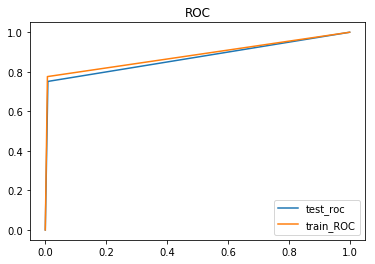


REPORT
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      5870
          1       0.94      0.75      0.83      1013

avg / total       0.96      0.96      0.95      6883

ACCURACY =  0.9561237832340549
-----------------


In [29]:
groups = np.array(triplexes.pdb_chain.values)
group_kfold = GroupKFold(n_splits=5)
#group_kfold.get_n_splits(X, y, groups)

description = ['type', 'dssrs', 'bps', 'dists']

for train_index, test_index in group_kfold.split(triplexes, triplexes_target, groups):
    #triplexes_data = triplexes.iloc[:, 5:475]
    #print(triplexes_data)
    X_train_middle, X_test_middle = triplexes.loc[list(train_index)], triplexes.loc[test_index]
    X_train = X_train_middle.iloc[:, 5:475]
    X_test = X_test_middle.iloc[:, 5:475]
    y_train, y_test = triplexes_target.loc[train_index], triplexes_target.loc[test_index]

    
    a = Counter(list(triplexes.loc[list(train_index)].pdb_chain.values))
    b = Counter(list(triplexes.loc[list(test_index)].pdb_chain.values))
    
    for key in a:
        if key in b.keys():
            print("FUUUUUUUUU")
    print("TEST_GROUPS", Counter(list(triplexes.pdb_chain.loc[test_index])))
    rf_classifier_cv.fit(X_train, y_train)
    
    #prediction by chains
    chains = list(set(X_test_middle.pdb_chain.values))

    print("")
    for chain in chains:
        middle_check_test = X_test_middle.loc[X_test_middle['pdb_chain'] == chain]
        middle_target_test = middle_check_test['istriple']
        middle_check_test_ = middle_check_test.iloc[:, 5:475]
    
        prediction_result_by_chain = rf_classifier_cv.predict(middle_check_test_)
        predict_proba_by_chain = rf_classifier_cv.predict_proba(middle_check_test_)
        print("")

        
        #PREDICTED PROBABILITIES
        i = 0
        for index, row in middle_check_test.iterrows():
            if middle_target_test[index] != prediction_result_by_chain[i]:
                print(row[description])
                print("")
                print("PROBA: ", predict_proba_by_chain[i])
            i = i + 1
            print("")
            print("equal")
            print("")

        print("CONFUSION MATRIX By chain: ", chain)
        print(confusion_matrix(middle_target_test, prediction_result_by_chain))
        print("")
    
    #simple prediction
    prediction_result = rf_classifier_cv.predict(X_test)
    prediction_prob = rf_classifier_cv.predict_proba(X_test)
    
    #TRY TO PREDICT TRAIN
    prediction_train = rf_classifier_cv.predict(X_train)
    fpr_train, tpr_train, _ = metrics.roc_curve(y_train,  prediction_train)
    auc_train = metrics.roc_auc_score(y_train, prediction_train)
    print("AUC_TRAIN = ", auc_train)
    
    #---------------------------------
    print("")
    fpr, tpr, _ = metrics.roc_curve(y_test,  prediction_result)
    auc = metrics.roc_auc_score(y_test, prediction_result)
    print("AUC = ", auc)
    line_test, = plt.plot(fpr, tpr, label='test_roc')
    line_train, = plt.plot(fpr_train, tpr_train, label='train_roc')
    plt.legend( [line_test, line_train], ['test_roc', 'train_ROC'], loc = 4)
    plt.title("ROC")
    plt.show()


    print("")
    print("REPORT")
    print(classification_report(y_test, prediction_result))
    print("ACCURACY = ", accuracy_score(y_test, prediction_result))
    print("-----------------")


[[5820   50]
 [ 252  761]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          5820   50  5870
1           252  761  1013
All        6072  811  6883


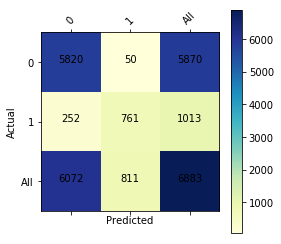

In [306]:
print(confusion_matrix(y_test, prediction_result))
plot_confusion_matrix(pd.crosstab(y_test, prediction_result, rownames=['Actual'], colnames=['Predicted'], margins=True))

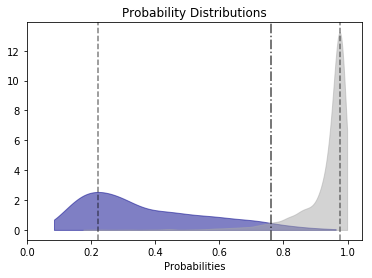

In [34]:
probability_density(prediction_prob[:, 0], y_test)

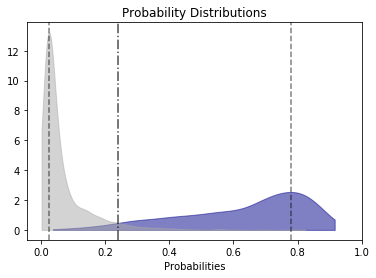

In [35]:
probability_density(prediction_prob[:, 1], y_test)

In [33]:
prediction_prob

array([[0.97152524, 0.02847476],
       [0.93307588, 0.06692412],
       [0.32723728, 0.67276272],
       ...,
       [0.85613661, 0.14386339],
       [0.19482893, 0.80517107],
       [0.9792166 , 0.0207834 ]])

In [ ]:
#обучающая и тестовая выборки

check_train = triplexes.loc[list(train_dataset)]
target_train = check_train.istriple.values

check_train = check_train.iloc[:, 5:475]

check_test = triplexes.loc[list(test_dataset)]
target_test = check_test.istriple.values

rf_classifier = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)
rf_classifier.fit(check_train, target_train)

chains = list(set(check_test.pdb_chain.values))

for chain in chains:
    middle_check_test = check_test.loc[check_test['pdb_chain'] == chain]
    middle_target_test = middle_check_test['istriple']
    middle_check_test = middle_check_test.iloc[:, 5:475]
    
    prediction_result = rf_classifier.predict(middle_check_test)

    print("CONFUSION MATRIX", chain)
    print(confusion_matrix(middle_target_test, prediction_result))
    print("")
    fpr, tpr, _ = metrics.roc_curve(middle_target_test,  prediction_result)
    try:
        auc = metrics.roc_auc_score(middle_target_test, prediction_result)
        print("AUC = ", auc)
    except Exception as e:
        print("ERROR", e, chain)
    plt.plot(fpr, tpr, label="ROC")
    plt.legend(loc=4)
    plt.show()

In [196]:
# 10 фолдов

groups = np.array(triplexes.pdb_chain.values)
group_kfold = GroupKFold(n_splits=10)
#group_kfold.get_n_splits(X, y, groups)

for train_index, test_index in group_kfold.split(triplexes_data, triplexes_target, groups):
    print("TRAIN:", train_index, "TEST:", test_index)
    print("")
    X_train, X_test = triplexes_data.loc[list(train_index)], triplexes_data.loc[test_index]
    y_train, y_test = triplexes_target.loc[train_index], triplexes_target.loc[test_index]
    rf_classifier_cv.fit(X_train, y_train)
    prediction_result = rf_classifier_cv.predict(X_test)
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, prediction_result))
    print("")
    print("REPORT")
    print(classification_report(y_test, prediction_result))
    print("ACCURACY", accuracy_score(y_test, prediction_result))
    print("-----------------")


TRAIN: [    0     1     2 ... 34412 34413 34414] TEST: [  284   285   286 ... 29585 29586 29587]

CONFUSION MATRIX
[[2910   25]
 [ 153  354]]

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2935
          1       0.93      0.70      0.80       507

avg / total       0.95      0.95      0.95      3442

ACCURACY 0.9482858803021499
-----------------
TRAIN: [    0     1     2 ... 34412 34413 34414] TEST: [   59    60    61 ... 33337 33338 33339]

CONFUSION MATRIX
[[2904   31]
 [ 169  338]]

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2935
          1       0.92      0.67      0.77       507

avg / total       0.94      0.94      0.94      3442

ACCURACY 0.9418942475305055
-----------------
TRAIN: [    0     1     2 ... 34412 34413 34414] TEST: [  170   171   172 ... 30152 30153 30154]

CONFUSION MATRIX
[[2907   28]
 [ 144  363]]

REPORT
             precision    re

In [197]:
# 15 фолдов

groups = np.array(triplexes.pdb_chain.values)
group_kfold = GroupKFold(n_splits=15)

for train_index, test_index in group_kfold.split(triplexes_data, triplexes_target, groups):
    print("TRAIN:", train_index, "TEST:", test_index)
    print("")
    X_train, X_test = triplexes_data.loc[list(train_index)], triplexes_data.loc[test_index]
    y_train, y_test = triplexes_target.loc[train_index], triplexes_target.loc[test_index]
    rf_classifier_cv.fit(X_train, y_train)
    prediction_result = rf_classifier_cv.predict(X_test)
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, prediction_result))
    print("")
    print("REPORT")
    print(classification_report(y_test, prediction_result))
    print("ACCURACY", accuracy_score(y_test, prediction_result))
    print("-----------------")


TRAIN: [    0     1     2 ... 34412 34413 34414] TEST: [  353   354   355 ... 30244 30245 30246]

CONFUSION MATRIX
[[1929   26]
 [ 112  228]]

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1955
          1       0.90      0.67      0.77       340

avg / total       0.94      0.94      0.94      2295

ACCURACY 0.9398692810457516
-----------------
TRAIN: [    0     1     2 ... 34412 34413 34414] TEST: [  231   232   233 ... 30152 30153 30154]

CONFUSION MATRIX
[[1935   23]
 [ 100  237]]

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1958
          1       0.91      0.70      0.79       337

avg / total       0.95      0.95      0.94      2295

ACCURACY 0.9464052287581699
-----------------
TRAIN: [    0     1     2 ... 34412 34413 34414] TEST: [   19    20    21 ... 25301 25302 25303]

CONFUSION MATRIX
[[1938   20]
 [  96  240]]

REPORT
             precision    re